## Problem Statement - I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goals

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1. Reading and Understanding the data

In [1]:
# Disabling Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [3]:
sns.set_palette('tab10')
sns.set_style('whitegrid')

In [4]:
# Loading the dataset

prices_house = pd.read_csv('train.csv')

In [5]:
# Loading first 5 rows of the dataset

prices_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Looking at the number of rows and columns of the dataset

print(f"The dataset has {prices_house.shape[0]} rows and {prices_house.shape[1]} columns")

The dataset has 1460 rows and 81 columns


In [7]:
# Looking at data types of various columns

prices_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Looking at statistics of numeric columns

prices_house.describe(percentiles = [.25, .50, .75, .90, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.0100

### 2a. Data Preparation

#### Checking the distribution of target variable Sale Price

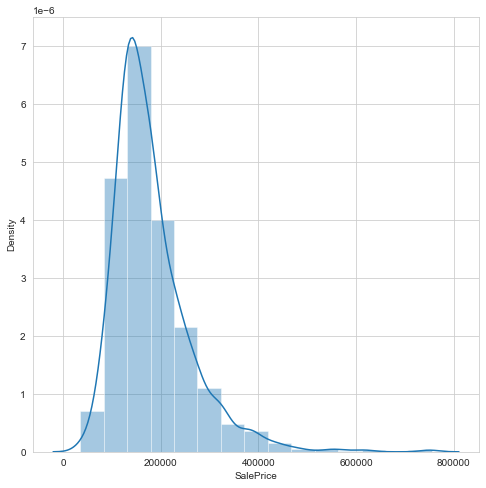

In [9]:
plt.figure(figsize = (8,8))
sns.distplot(prices_house['SalePrice'], bins = 15)
plt.show()

In [10]:
prices_house['SalePrice'] = np.log(prices_house['SalePrice'])

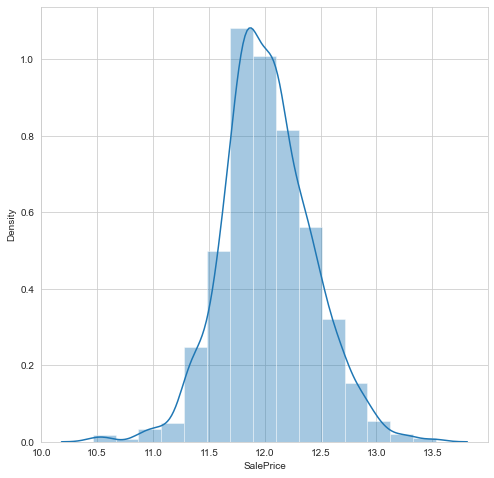

In [11]:
plt.figure(figsize = (8,8))
sns.distplot(prices_house['SalePrice'], bins = 15)
plt.show()

In [12]:
# Accounting for any duplicates in Prospect ID

prices_house['Id'].nunique()

1460

In [13]:
# From the purpose of analysis, we do not need the Id column and hence it is safe to drop it

prices_house = prices_house.drop(['Id'], axis = 1)
prices_house.shape

(1460, 80)

In [14]:
# Checking if there is any column which has just one unique value:

col_unique = prices_house.nunique() == 1
col_unique_list = list(col_unique[col_unique.values].index)
prices_house = prices_house.drop(col_unique_list, axis =1)
print(f"Number of columns dropped having a single unique value: {len(col_unique_list)}")

Number of columns dropped having a single unique value: 0


In [15]:
# Printing out column names for reference

prices_house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [16]:
# Let's check values under all the object type variables (minus float/integer type)

obj_vars = prices_house.select_dtypes(include = ['object']).dtypes.index
obj_vars

for i in prices_house[obj_vars]:
    print('\n' + i)
    print('-'*30)
    print(prices_house[obj_vars][i].value_counts(dropna = False)) # This will show us all the null values


MSZoning
------------------------------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
------------------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
------------------------------
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

LotShape
------------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
------------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
------------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
------------------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
------------------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
------------------------------
NAmes     

In [17]:

null_col = prices_house.isnull().mean()*100
null_col = null_col[null_col.values > 0]
null_col.sort_values(ascending = False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [18]:
# From the above output, we can see that there are columns which have a very high percentage of null values. 
# Let's us try to dive deeper into them:

high_null_col = null_col[null_col.values > 45]
print("Description of columns containing more than 45% of null values: ")
print('')
print(high_null_col.sort_values(ascending = False))
print('')
print("Number of such high null columns: {}".format(len(high_null_col)))

Description of columns containing more than 45% of null values: 

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
dtype: float64

Number of such high null columns: 5


In [19]:
list(high_null_col.index)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [20]:
prices_house = prices_house.drop(labels = high_null_col.index, axis =1)

In [21]:
prices_house.shape

(1460, 75)

### 2b. Data Imputation

In [22]:
# Again accounting for any missing values

null_col = prices_house.isnull().mean()*100
null_col = null_col[null_col.values > 0]
null_col.sort_values(ascending = False)

LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [23]:
# From the above output, we can see that there are columns which majorly have a low high percentage of null values. 
# Let's us try to dive deeper into them:

low_null_col = null_col[null_col.values>0]
print("Description of columns containing less than 45% of null values: ")
print('')
print(low_null_col.sort_values(ascending = False))
print('')
print("Number of such low null columns: {}".format(len(low_null_col)))

Description of columns containing less than 45% of null values: 

LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Number of such low null columns: 14


In [24]:
# Importing current year

import datetime

now = datetime.datetime.now()
current_year = now.year
current_year

2021

In [25]:
# Imputing Missing Values

#1. Imputing Categorical Variables

# From the data dictionary, categorical variables with missing values will be treated as the following:

#A. MasVnrType

prices_house['MasVnrType'] = prices_house['MasVnrType'].fillna(value = 'None', axis = 0)
 
#B. BsmtQual

prices_house['BsmtQual'] = prices_house['BsmtQual'].fillna(value = 'NB', axis = 0)

#C. BsmtCond

prices_house['BsmtCond'] = prices_house['BsmtCond'].fillna(value = 'NB', axis = 0)

#D. BsmtExposure

prices_house['BsmtExposure'] = prices_house['BsmtExposure'].fillna(value = 'NB', axis = 0)

#E. BsmtFinType1

prices_house['BsmtFinType1'] = prices_house['BsmtFinType1'].fillna(value = 'NB', axis = 0)

#F. BsmtFinType2

prices_house['BsmtFinType2'] = prices_house['BsmtFinType2'].fillna(value = 'NB', axis = 0)

#G. Electrical

prices_house = prices_house.dropna(subset = ['Electrical'])

#H. GarageType

prices_house['GarageType'] = prices_house['GarageType'].fillna(value = 'NG', axis = 0)

#I. GarageYrBlt (Since Garage was not built for a few houses)

prices_house['GarageYrBlt'] = prices_house['GarageYrBlt'].fillna(value = 0 , axis = 0)

#J. GarageFinish

prices_house['GarageFinish'] = prices_house['GarageFinish'].fillna(value = 'NG', axis = 0)

#K. GarageQual

prices_house['GarageQual'] = prices_house['GarageQual'].fillna(value = 'NG', axis = 0)

#L. GarageCond

prices_house['GarageCond'] = prices_house['GarageCond'].fillna(value = 'NG', axis = 0)

#2. Imputing Numerical Variables

#A. LotFrontage

prices_house['LotFrontage'] = prices_house['LotFrontage'].fillna(value = prices_house['LotFrontage'].median(), axis = 0)

#B. MasVnrArea 

prices_house['MasVnrArea'] = prices_house['MasVnrArea'].fillna(value = 0, axis = 0) 

In [26]:
# Rechecking Null Values

prices_house.isnull().mean()*100

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

In [27]:
# Re-looking at the number of rows and columns of the dataset after imputation of missing values and dropping null values

print(f"The dataset has {prices_house.shape[0]} rows and {prices_house.shape[1]} columns")

The dataset has 1459 rows and 75 columns


### 3. Exploratory Data Analysis

#### 3a. Categorical Variables

In [28]:
# Let's list all the objective type variables

obj_vars = prices_house.select_dtypes(include = ['object']).dtypes.index
len(obj_vars)

38

In [29]:
def count_var(x):
    plt.figure(figsize=(5,5))
    sns.countplot(x = x, data = prices_house)
    plt.xticks(rotation = 90)
    plt.show()

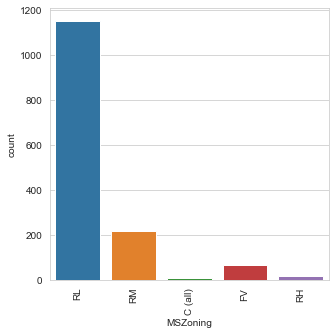

In [30]:
count_var('MSZoning')

In [31]:
prices_house['MSZoning'] = prices_house['MSZoning'].replace(to_replace=['FV','RH','RL','RP','RM'],value='Residentail')
prices_house['MSZoning'] = prices_house['MSZoning'].replace(to_replace=['A','C (all)','I'],value='Non-Residentail')

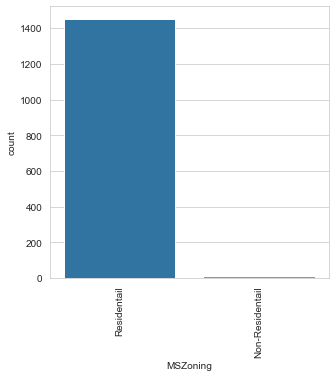

In [32]:
count_var('MSZoning')

In [33]:
prices_house['MSZoning'].value_counts()

Residentail        1449
Non-Residentail      10
Name: MSZoning, dtype: int64

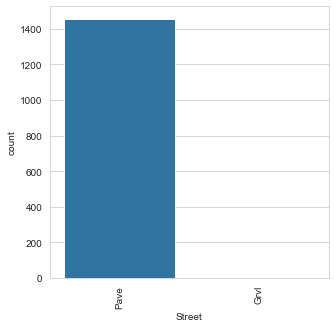

In [34]:
count_var('Street')

In [35]:
# Dropping Street Feature since Pave far outweighs the other value

prices_house = prices_house.drop(['Street'], axis =1)

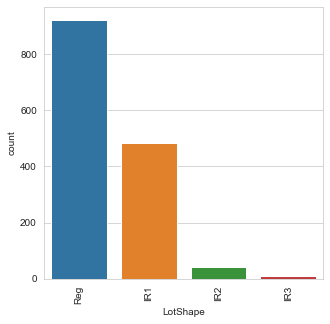

In [36]:
count_var('LotShape')

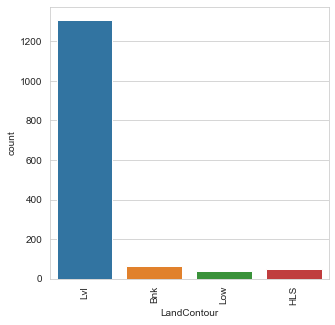

In [37]:
count_var('LandContour')

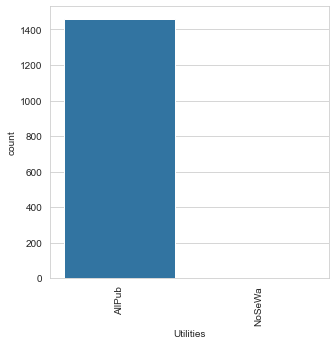

In [38]:
count_var('Utilities')

In [39]:
# Dropping Utilities Feature since one value far outweighs the other value

prices_house = prices_house.drop(['Utilities'], axis =1)

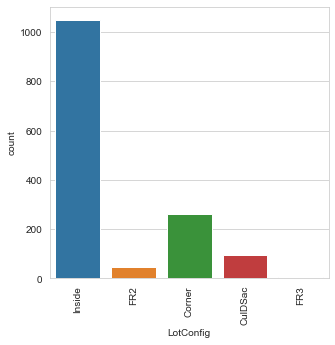

In [40]:
count_var('LotConfig')

In [41]:
prices_house['LotConfig'] = prices_house['LotConfig'].replace(to_replace=['FR2','FR3'], value = 'FR2+FR3')

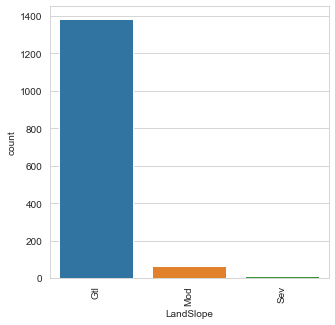

In [42]:
count_var('LandSlope')

In [43]:
# Dropping Landslope Feature since one value far outweighs the other values

prices_house = prices_house.drop(['LandSlope'], axis =1)

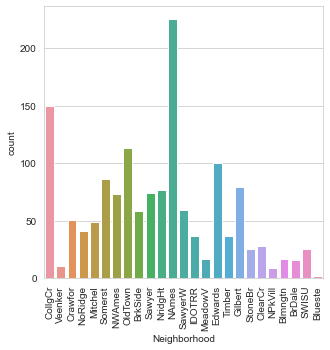

In [44]:
count_var('Neighborhood')

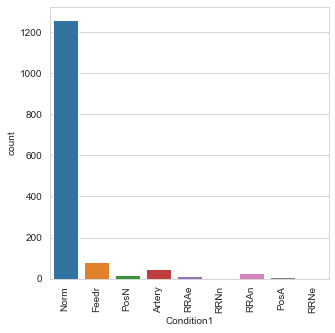

In [45]:
count_var('Condition1')

In [46]:
prices_house['Condition1'] = prices_house['Condition1'].replace(to_replace=['RRAe','PosA','RRNn','RRNe'], value = 'Other')

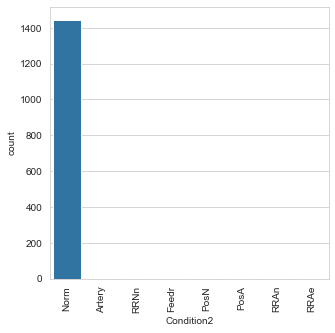

In [47]:
count_var('Condition2')

In [48]:
# Dropping Conition2 Feature since one value far outweighs the other values

prices_house = prices_house.drop(['Condition2'], axis =1)

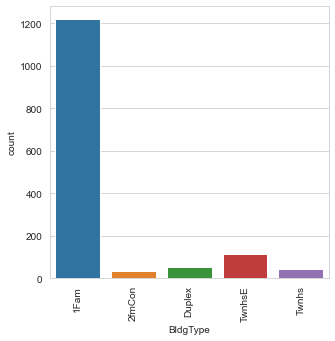

In [49]:
count_var('BldgType')

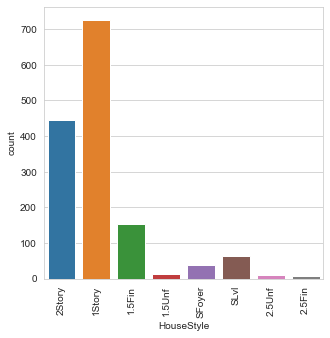

In [50]:
count_var('HouseStyle')

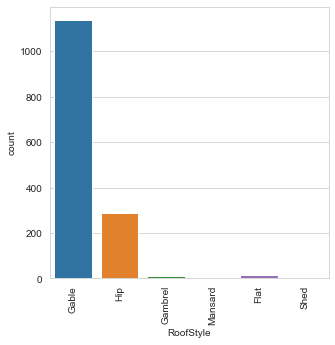

In [51]:
count_var('RoofStyle')

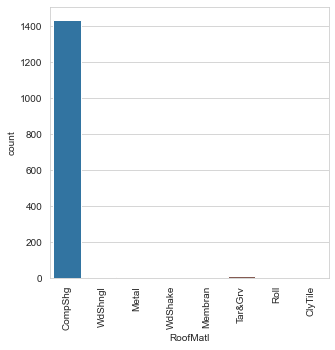

In [52]:
count_var('RoofMatl')

In [53]:
# Dropping RoofMat1 Feature since one value far outweighs the other values

prices_house = prices_house.drop(['RoofMatl'], axis =1)

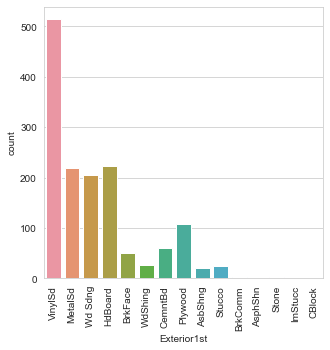

In [54]:
count_var('Exterior1st')

In [55]:
prices_house['Exterior1st'] = prices_house['Exterior1st'].replace(to_replace=['BrkComm','AsphShn', 'Stone','ImStucc','CBlock'], value = 'Other')

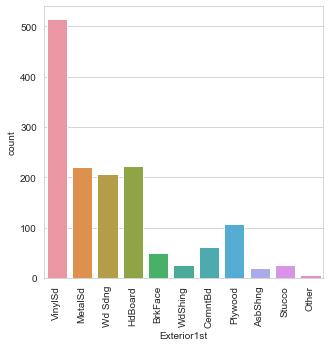

In [56]:
count_var('Exterior1st')

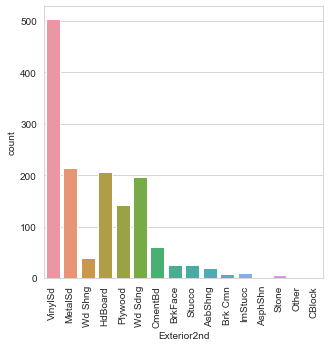

In [57]:
count_var('Exterior2nd')

In [58]:
prices_house['Exterior2nd'] = prices_house['Exterior2nd'].replace(to_replace=['Brk Cmn', 'ImStucc', 'AsphShn', 'Stone', 'CBlock'], value = 'Other')

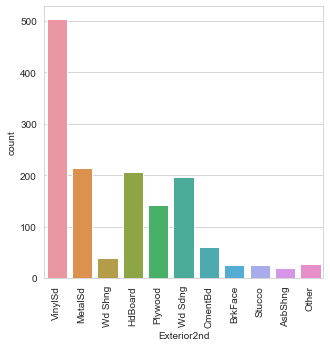

In [59]:
count_var('Exterior2nd')

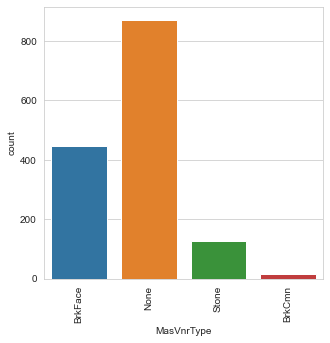

In [60]:
count_var('MasVnrType')

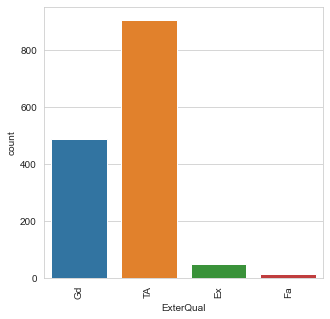

In [61]:
count_var('ExterQual')

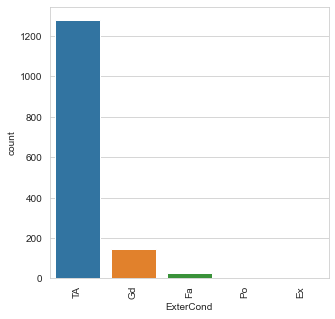

In [62]:
count_var('ExterCond')

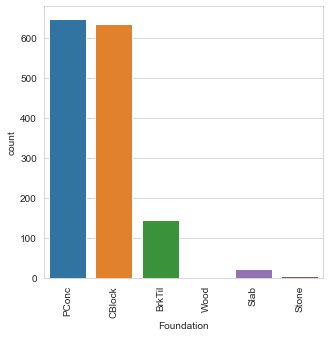

In [63]:
count_var('Foundation')

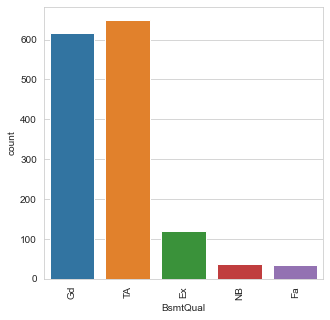

In [64]:
count_var('BsmtQual')

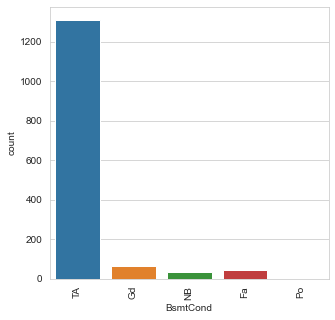

In [65]:
count_var('BsmtCond')

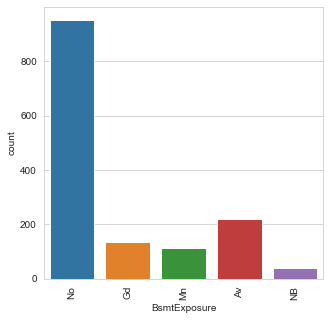

In [66]:
count_var('BsmtExposure')

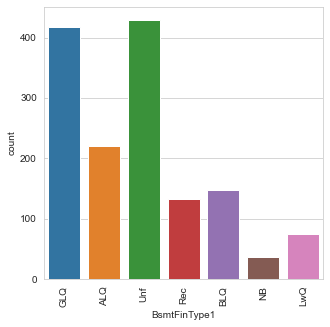

In [67]:
count_var('BsmtFinType1')

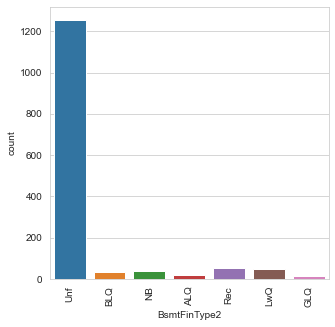

In [68]:
count_var('BsmtFinType2')

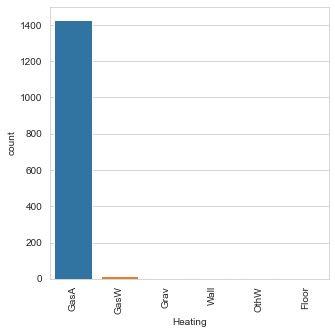

In [69]:
count_var('Heating')

In [70]:
# Dropping Heating Feature since one value far outweighs the other values

prices_house = prices_house.drop(['Heating'], axis =1)

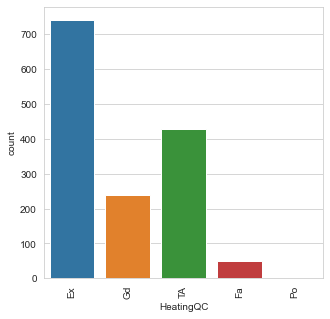

In [71]:
count_var('HeatingQC')

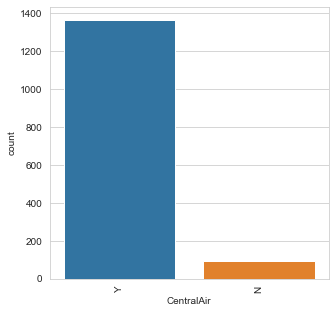

In [72]:
count_var('CentralAir')

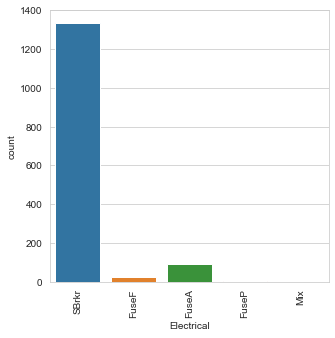

In [73]:
count_var('Electrical')

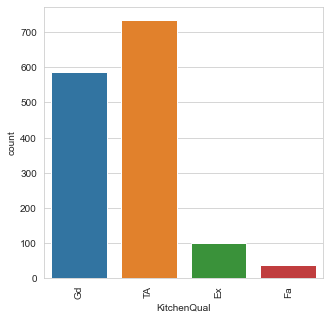

In [74]:
count_var('KitchenQual')

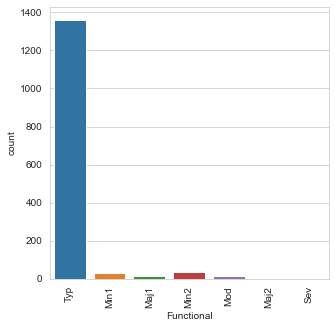

In [75]:
count_var('Functional')

In [76]:
# Dropping Functional Feature since one value far outweighs the other values

prices_house = prices_house.drop(['Functional'], axis =1)

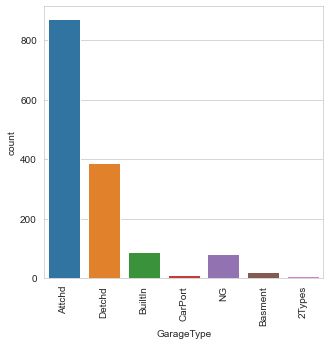

In [77]:
count_var('GarageType')

In [78]:
prices_house['GarageType'] = prices_house['GarageType'].replace(to_replace=['CarPort','2Types'], value = 'Car+2Type')

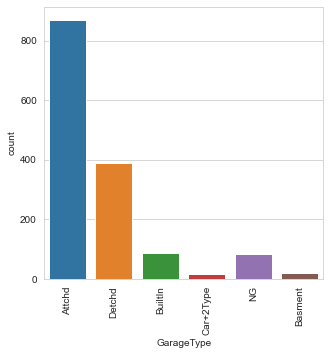

In [79]:
count_var('GarageType')

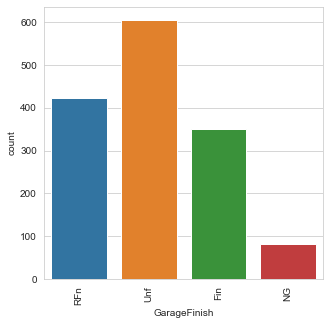

In [80]:
count_var('GarageFinish')

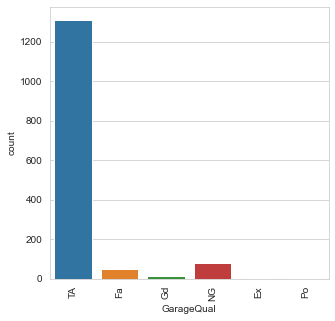

In [81]:
count_var('GarageQual')

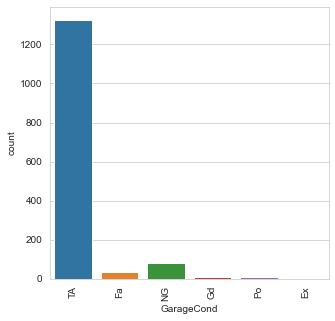

In [82]:
count_var('GarageCond')

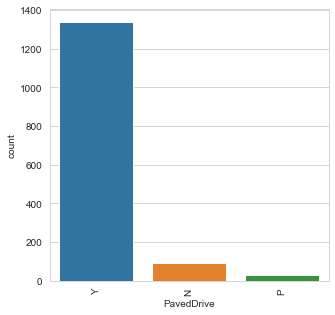

In [83]:
count_var('PavedDrive')

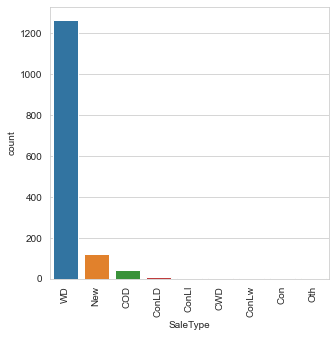

In [84]:
count_var('SaleType')

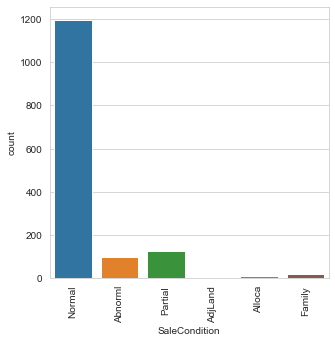

In [85]:
count_var('SaleCondition')

In [86]:
prices_house['SaleCondition'] = prices_house['SaleCondition'].replace(to_replace=['Alloca','AdjLand'], value = 'Other')

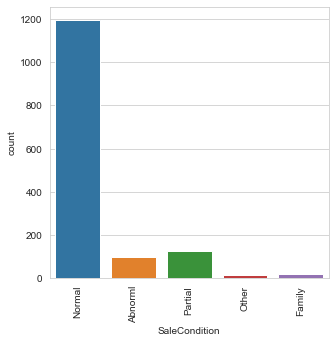

In [87]:
count_var('SaleCondition')

#### 3b. Numerical Variables

In [88]:
# Let's list all the Numerical type variables

num_vars = prices_house.select_dtypes(include = ['int64', 'float64']).dtypes.index
num_vars

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [89]:
def dist_var(a,b,c,d,e,f):
    plt.figure(figsize=(18,12))
    
    plt.subplot(3,2,1)
    sns.distplot(a = prices_house[a])
    
    plt.subplot(3,2,2)
    sns.distplot(a = prices_house[b])
    
    plt.subplot(3,2,3)
    sns.distplot(a = prices_house[c])
    
    plt.subplot(3,2,4)
    sns.distplot(a = prices_house[d])
    
    plt.subplot(3,2,5)
    sns.distplot(a = prices_house[e])
    
    plt.subplot(3,2,6)
    sns.distplot(a = prices_house[f])
    
    plt.tight_layout()
    plt.show()

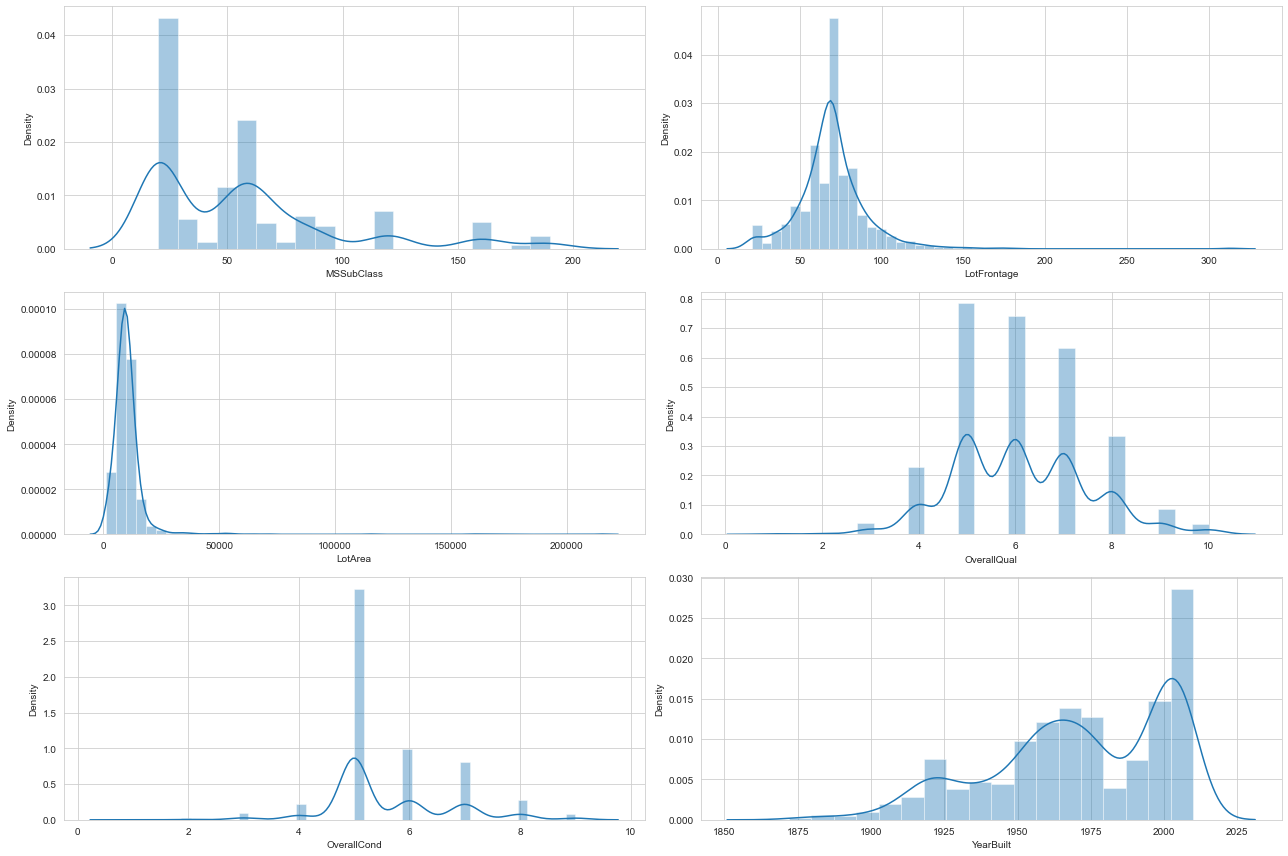

In [90]:
dist_var('MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt')

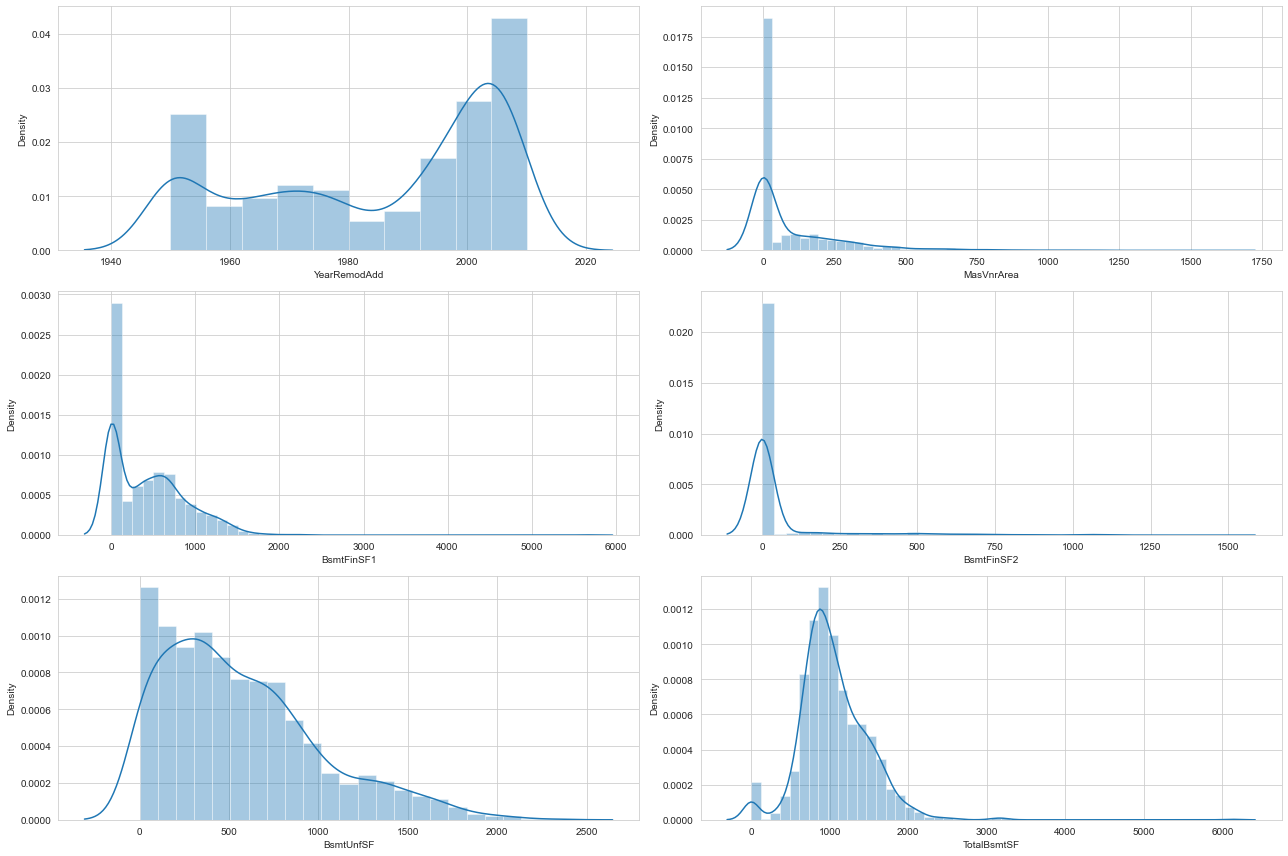

In [91]:
dist_var('YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF')

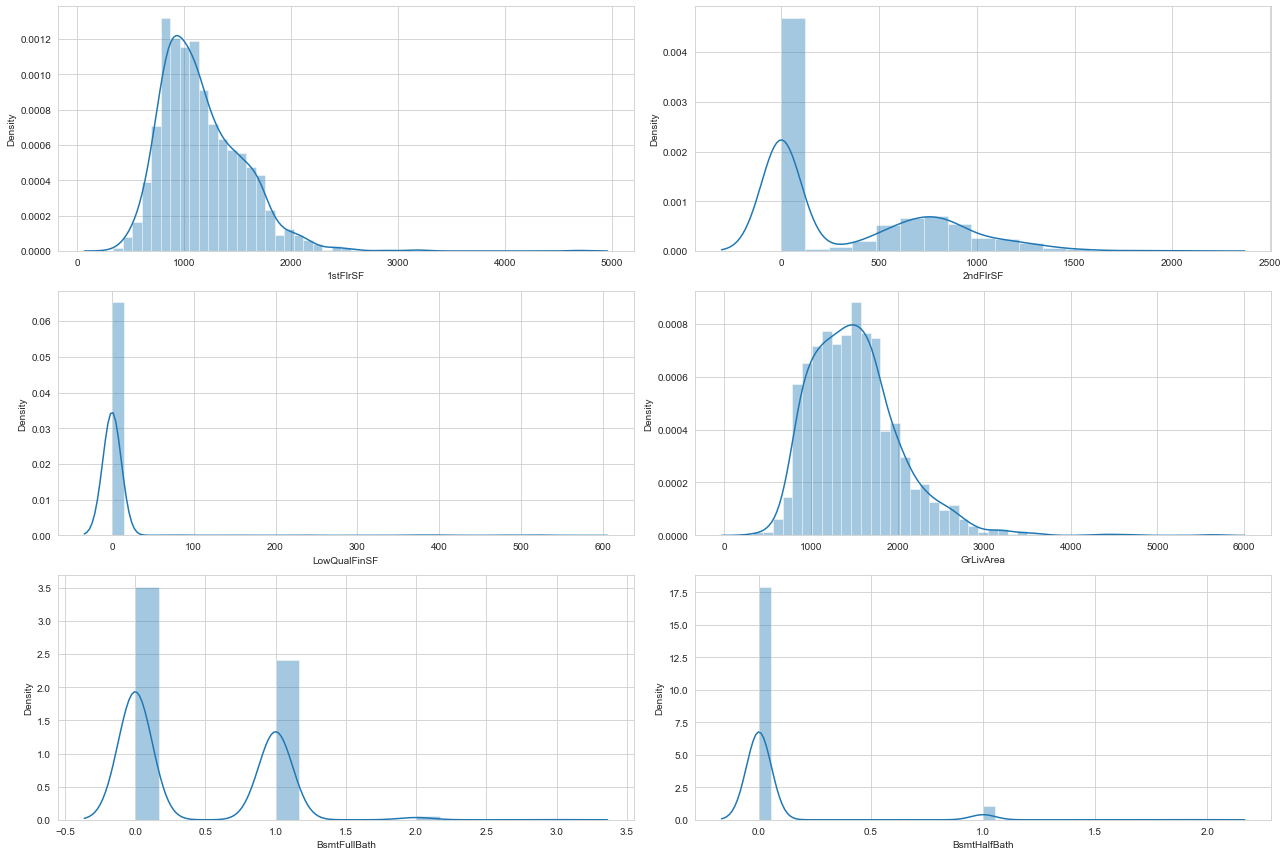

In [92]:
dist_var('1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath')

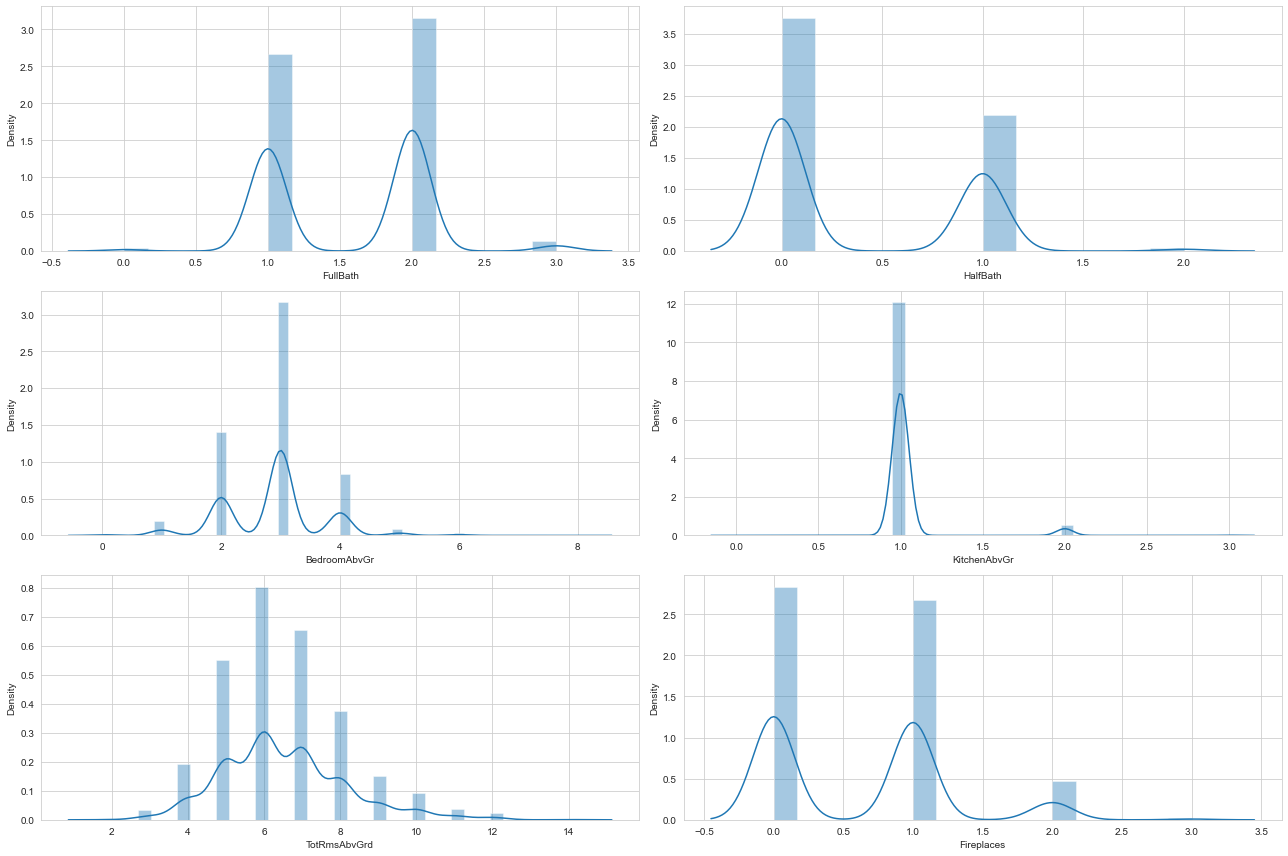

In [93]:
dist_var('FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces')

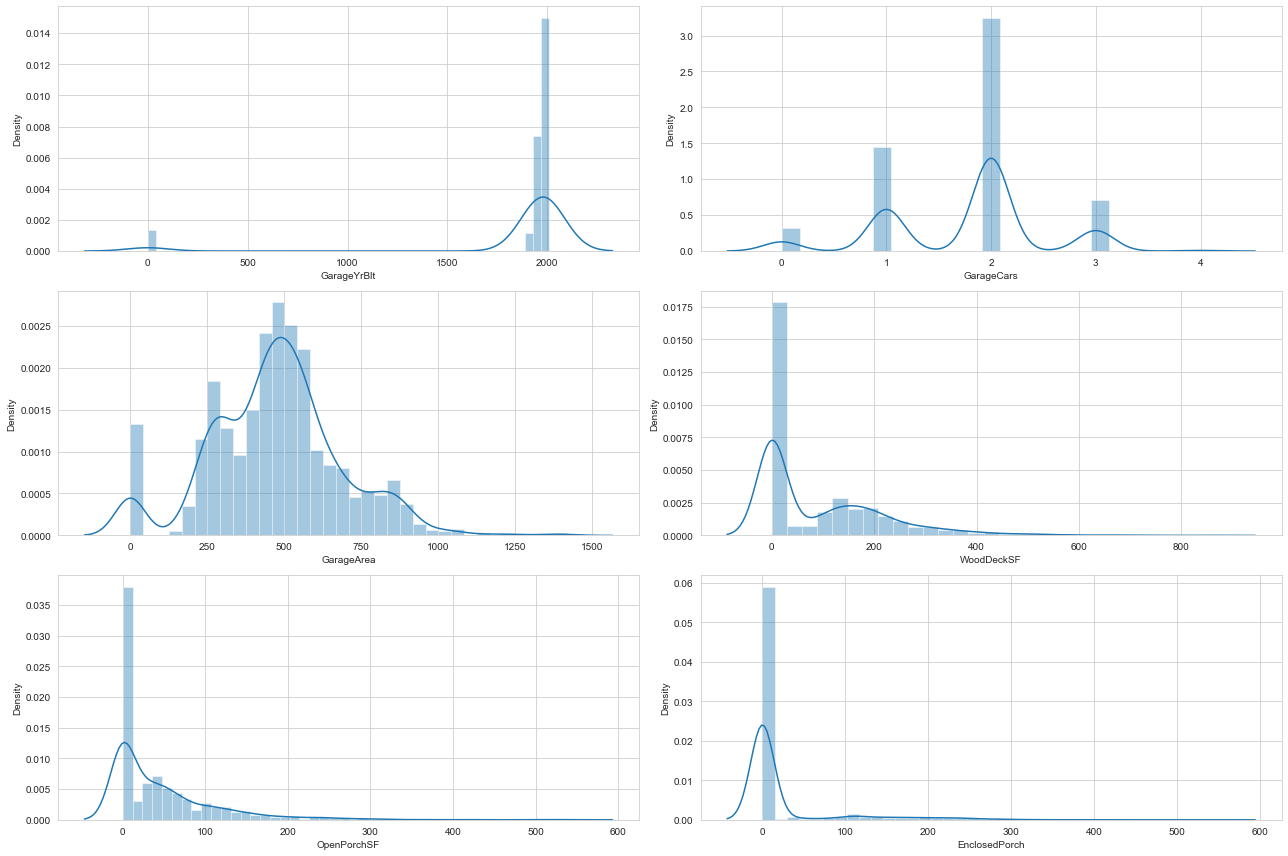

In [94]:
dist_var('GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch')

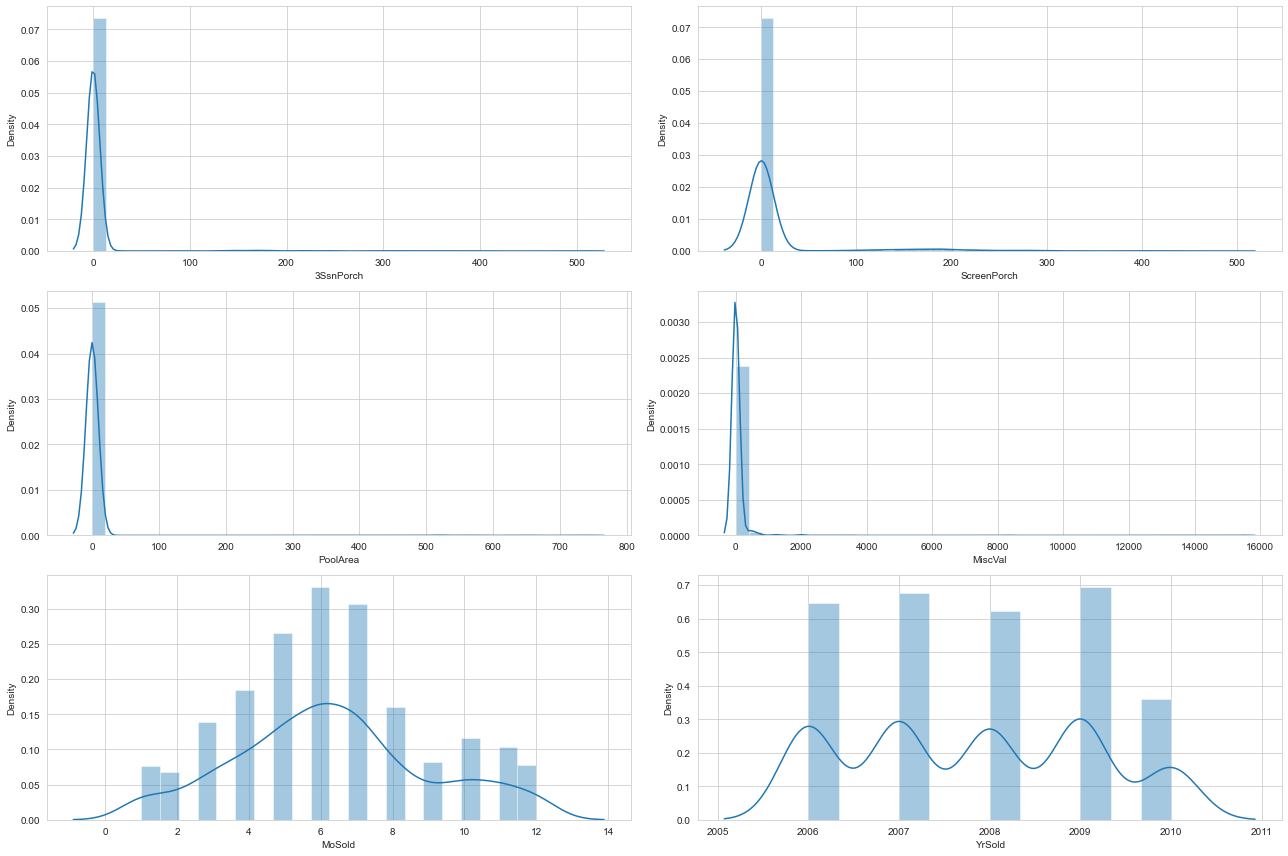

In [95]:
dist_var('3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold')

In [96]:
prices_house = prices_house.drop(['MasVnrArea', 'BsmtFinSF1', 'LowQualFinSF','EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold'], axis =1)

In [97]:
# Re-looking at the number of rows and columns of the dataset after dropping variables:

print(f"The dataset has {prices_house.shape[0]} rows and {prices_house.shape[1]} columns")

The dataset has 1459 rows and 59 columns


### 4. Feature Engineering

#### 4a. Numerical Columns

In [98]:
prices_house['GarageYrBlt'] = prices_house['GarageYrBlt'].astype('int64')

In [99]:
# Creating Numerical Columns

prices_house['YearBuilt_Age'] = current_year - prices_house['YearBuilt']

prices_house[['YearBuilt', 'YearBuilt_Age']].sample(10)

,YearBuilt,YearBuilt_Age
365,1920,101
533,1946,75
1452,2005,16
540,2006,15
847,1972,49
1339,1972,49
469,1993,28
1305,2006,15
116,1962,59
1413,2005,16


In [100]:
# Re-looking at the number of rows and columns of the dataset after outier removal

print(f"The dataset has {prices_house.shape[0]} rows and {prices_house.shape[1]} columns")

The dataset has 1459 rows and 60 columns


In [101]:
# Dropping year related columns:
# We are only interested in the year the house was built and not other three features (RFE also ended up eliminating these other three feautures in previous runs of the model)

prices_house = prices_house.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis = 1)

In [102]:
# Re-looking at the number of rows and columns of the dataset after outier removal

print(f"The dataset has {prices_house.shape[0]} rows and {prices_house.shape[1]} columns")

The dataset has 1459 rows and 56 columns


In [103]:
prices_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   LotConfig      1459 non-null   object 
 7   Neighborhood   1459 non-null   object 
 8   Condition1     1459 non-null   object 
 9   BldgType       1459 non-null   object 
 10  HouseStyle     1459 non-null   object 
 11  OverallQual    1459 non-null   int64  
 12  OverallCond    1459 non-null   int64  
 13  RoofStyle      1459 non-null   object 
 14  Exterior1st    1459 non-null   object 
 15  Exterior2nd    1459 non-null   object 
 16  MasVnrType     1459 non-null   object 
 17  ExterQual      1459 non-null   object 
 18  ExterCon

#### 4b. Categorical Columns

In [104]:
obj_vars = prices_house.select_dtypes(include = ['object']).dtypes.index
obj_vars

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [105]:
len(obj_vars)

31

In [106]:
##Exterior qulaity material varaibles are categorical and can be converted into ordered numerical data.
prices_house['ExterQual'] = prices_house['ExterQual'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
prices_house['ExterCond'] = prices_house['ExterCond'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})

##Basement Qulaity check variables are categoricals and can be converted to ordered numerical data 
prices_house['BsmtQual'] = prices_house['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NB':0})
prices_house['BsmtCond'] = prices_house['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NB':0})
prices_house['BsmtExposure'] = prices_house['BsmtExposure'].map({'Gd':5, 'Av':4, 'Mn':3, 'Fa':2, 'No':1, 'NB':0})
prices_house['BsmtFinType1'] = prices_house['BsmtFinType1'].map({'GLQ':6,'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NB':0})
prices_house['BsmtFinType2'] = prices_house['BsmtFinType2'].map({'GLQ':6,'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NB':0})
prices_house['HeatingQC'] = prices_house['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':1, 'Po':0})
prices_house['CentralAir'] = prices_house['CentralAir'].map({'Y':1,'N':0})
prices_house['KitchenQual'] = prices_house['KitchenQual'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
prices_house['GarageQual'] = prices_house['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NG':0})
prices_house['GarageCond'] = prices_house['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NG':0})
prices_house['PavedDrive'] = prices_house['PavedDrive'].map({ 'Y':2, 'N':1, 'P':0})

In [107]:
# Let's get dummy variables for all our categorical (ordinal and nominal) variables

def dummies(x,df):
    temp = pd.get_dummies(df[x], prefix = i, prefix_sep = '_', drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis =1, inplace = True)
    return df

# Applying the function to prices_house
obj_vars = prices_house.select_dtypes(include = ['object']).dtypes.index
obj_vars

for i in obj_vars:
    prices_house = dummies(i, prices_house)

In [108]:
prices_house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice,YearBuilt_Age,MSZoning_Residentail,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2+FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Basment,GarageType_BuiltIn,GarageType_Car+2Type,GarageType_Detchd,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,60,65.0,8450,7,5,3,2,4,3,1,6,1,0,150,856,5,1,856,854,1710,1,0,2,1,3,1,3,8,0,2,548,3,3,2,0,61,12.247694,18,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,20,80.0,9600,6,8,2,2,4,3,5,5,1,0,284,1262,5,1,1262,0,1262,0,1,2,0,3,1,2,6,1,2,460,3,3,2,298,0,12.109011,45,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,60,68.0,11250,7,5,3,2,4,3,3,6,1,0,434,920,5,1,920,866,1786,1,0,2,1,3,1,3,6,1,2,608,3,3,2,0,42,12.317167,20,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,70,60.0,9550,7,5,2,2,3,4,1,5,1,0,540,756,4,1,961,756,1717,1,0,1,0,3,1,3,7,1,3,642,3,3,2,0,35,11.849398,106,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,60,84.0,14260,8,5,3,2,4,3,4,6,1,0,490,1145,5,1,1145,1053,2198,1,0,2,1,4,1,3,9,1,3,836,3,3,2,192,84,12.429216,21,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [109]:
# Re-looking at the number of rows and columns of the dataset after outier removal

print(f"The dataset has {prices_house.shape[0]} rows and {prices_house.shape[1]} columns")

The dataset has 1459 rows and 145 columns


### 5. Outlier Analysis and Treatment

#### 5a. Outlier Treatment

In [110]:
prices_house.describe(percentiles = [.25, .50, .75, .90, .99]).T

,count,mean,std,min,25%,50%,75%,90%,99%,max
MSSubClass,1459.0,56.881426,42.310746,20.000000,20.000000,50.000000,70.000000,120.000000,190.000000,190.000000
LotFrontage,1459.0,69.861549,22.035077,21.000000,60.000000,69.000000,79.000000,92.000000,137.420000,313.000000
LotArea,1459.0,10517.363948,9984.666267,1300.000000,7549.000000,9477.000000,11603.000000,14388.400000,37593.680000,215245.000000
OverallQual,1459.0,6.100069,1.383171,1.000000,5.000000,6.000000,7.000000,8.000000,10.000000,10.000000
OverallCond,1459.0,5.575737,1.113079,1.000000,5.000000,5.000000,6.000000,7.000000,9.000000,9.000000
ExterQual,1459.0,2.396162,0.574384,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000
ExterCond,1459.0,2.083619,0.351167,0.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000
BsmtQual,1459.0,3.488691,0.876677,0.000000,3.000000,4.000000,4.000000,4.000000,5.000000,5.000000
BsmtCond,1459.0,2.934887,0.552345,0.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000
BsmtExposure,1459.0,1.952022,1.505509,0.000000,1.000000,1.000000,3.000000,4.000000,5.000000,5.000000


In [111]:
num_var = prices_house.select_dtypes(include = ['int64', 'float64']).dtypes.index
num_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'YearBuilt_Age'],
      dtype='object')

In [112]:
from scipy import stats
prices_house = prices_house[(np.abs(stats.zscore(prices_house[num_var])) < 5).all(axis=1)]

In [113]:
prices_house.describe(percentiles = [.25, .5, .75, .9, .99]).T

,count,mean,std,min,25%,50%,75%,90%,99%,max
MSSubClass,1343.0,56.641847,42.020103,20.00000,20.000000,50.000000,70.000000,120.000000,190.000000,190.000000
LotFrontage,1343.0,69.562919,19.671945,21.00000,60.000000,69.000000,79.000000,92.000000,129.580000,174.000000
LotArea,1343.0,9921.669397,5003.849004,1300.00000,7559.000000,9477.000000,11568.500000,14139.000000,27639.600000,57200.000000
OverallQual,1343.0,6.152643,1.345553,1.00000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
OverallCond,1343.0,5.575577,1.091929,1.00000,5.000000,5.000000,6.000000,7.000000,9.000000,9.000000
ExterQual,1343.0,2.413254,0.573667,1.00000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000
ExterCond,1343.0,2.084140,0.331519,1.00000,2.000000,2.000000,2.000000,2.800000,3.000000,3.000000
BsmtQual,1343.0,3.584512,0.678693,2.00000,3.000000,4.000000,4.000000,4.000000,5.000000,5.000000
BsmtCond,1343.0,3.011914,0.288644,1.00000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000
BsmtExposure,1343.0,1.976173,1.472358,0.00000,1.000000,1.000000,3.000000,4.000000,5.000000,5.000000


In [114]:
# Re-looking at the number of rows and columns of the dataset after outier removal

print(f"The dataset has {prices_house.shape[0]} rows and {prices_house.shape[1]} columns")

The dataset has 1343 rows and 145 columns


#### 5b. Removing Correlated Features

In [115]:
prices_house_corr = prices_house.drop('SalePrice', axis =1)
prices_house_corr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,YearBuilt_Age,MSZoning_Residentail,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2+FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Basment,GarageType_BuiltIn,GarageType_Car+2Type,GarageType_Detchd,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,60,65.0,8450,7,5,3,2,4,3,1,6,1,0,150,856,5,1,856,854,1710,1,0,2,1,3,1,3,8,0,2,548,3,3,2,0,61,18,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,20,80.0,9600,6,8,2,2,4,3,5,5,1,0,284,1262,5,1,1262,0,1262,0,1,2,0,3,1,2,6,1,2,460,3,3,2,298,0,45,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,60,68.0,11250,7,5,3,2,4,3,3,6,1,0,434,920,5,1,920,866,1786,1,0,2,1,3,1,3,6,1,2,608,3,3,2,0,42,20,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,70,60.0,9550,7,5,2,2,3,4,1,5,1,0,540,756,4,1,961,756,1717,1,0,1,0,3,1,3,7,1,3,642,3,3,2,0,35,106,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,60,84.0,14260,8,5,3,2,4,3,4,6,1,0,490,1145,5,1,1145,1053,2198,1,0,2,1,4,1,3,9,1,3,836,3,3,2,192,84,21,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [116]:
import numpy as np

# Create correlation matrix
corr_matrix = prices_house_corr.corr().abs()

# Selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

# Drop features 
prices_house = prices_house.drop(to_drop, axis=1)

In [117]:
# Re-looking at the number of rows and columns of the dataset after highly correlated features removal

print(f"The dataset has {prices_house.shape[0]} rows and {prices_house.shape[1]} columns")

The dataset has 1343 rows and 127 columns


In [118]:
# Resetting Index

prices_house = prices_house.reset_index(drop = True)
prices_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Columns: 127 entries, MSSubClass to SaleCondition_Other
dtypes: float64(2), int64(31), uint8(94)
memory usage: 469.7 KB


In [119]:
# Looking at how the numerical variables are correlated with the response variable

num_vars = prices_house.select_dtypes(include = ['int64', 'float64']).dtypes.index
num_vars 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Fireplaces', 'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'YearBuilt_Age'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

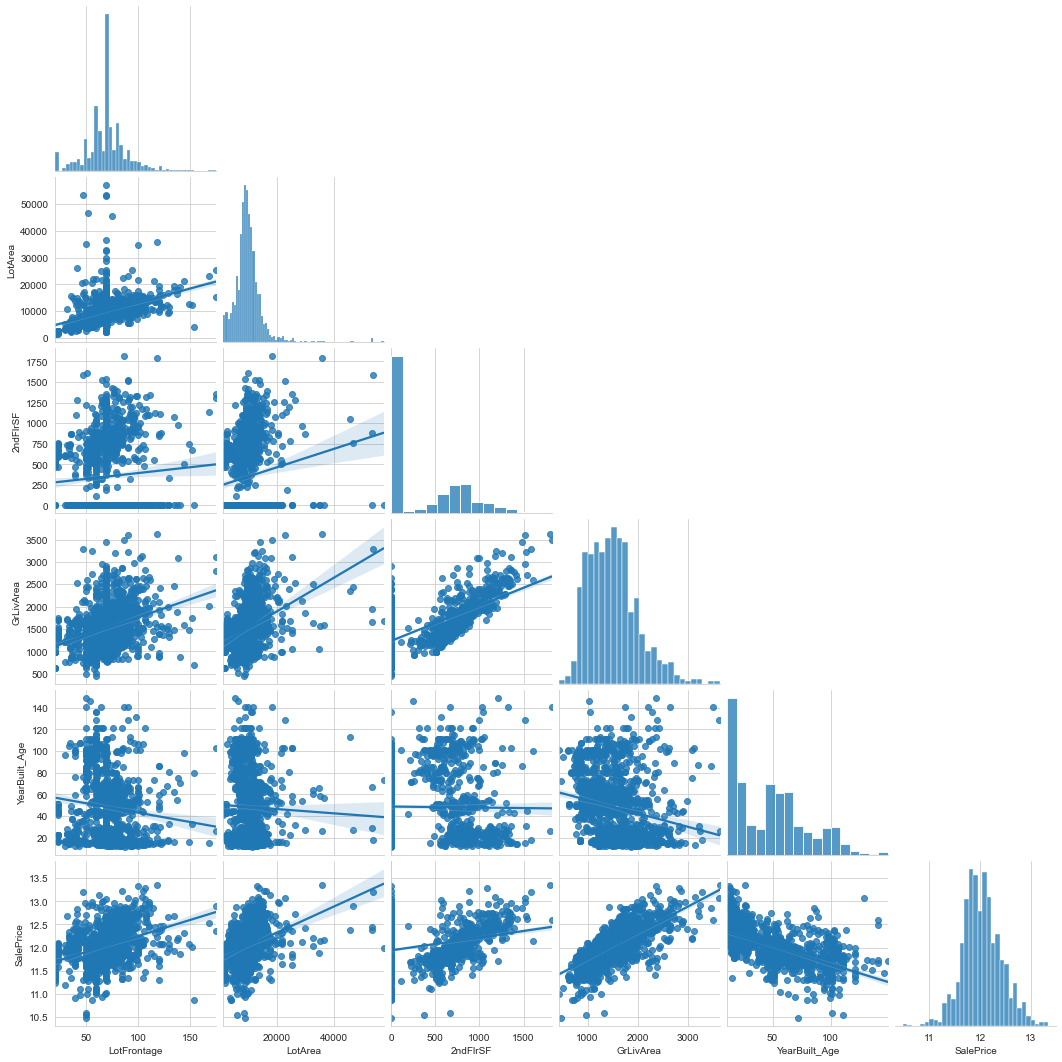

In [120]:
plt.figure(figsize = (20, 20))
sns.pairplot(prices_house, vars=['LotFrontage', 'LotArea', '2ndFlrSF','GrLivArea', 'YearBuilt_Age', 'SalePrice'], kind='reg', corner = True)
plt.show()

### 6. Model Building

In [121]:
# Splitting the data into training and testing set

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(prices_house, train_size = 0.7, test_size = 0.3, random_state = 42)

In [122]:
# Checking the shape of the train and test dataset

df_train.shape, df_test.shape

((940, 127), (403, 127))

In [123]:
# Scaling numerical variables of both df_train and df_test

df_train_num_var = df_train.select_dtypes(include = ['int64', 'float64']).dtypes.index

# Consolidating all the numerical variables of test set (only integer and float)
df_test_num_var = df_test.select_dtypes(include = ['int64', 'float64']).dtypes.index

from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

df_train[df_train_num_var] = standardscaler.fit_transform(df_train[df_train_num_var])
df_test[df_test_num_var] = standardscaler.transform(df_test[df_test_num_var])

In [124]:
# Splitting train and test datasets into X_train, y_train, X_test,y_test 

y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [125]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((940, 126), (940,), (403, 126), (403,))

In [126]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,940.0,-1.358252e-16,1.000532,-0.858117,-0.858117,-0.170355,0.288153,3.039201
LotFrontage,940.0,-2.445148e-16,1.000532,-2.368738,-0.457440,-0.016371,0.473706,5.129434
LotArea,940.0,-1.497029e-16,1.000532,-1.736870,-0.472910,-0.069972,0.337451,9.659153
OverallQual,940.0,1.907015e-16,1.000532,-3.861758,-0.858612,-0.107826,0.642961,2.895320
OverallCond,940.0,-3.070830e-17,1.000532,-4.193225,-0.551995,-0.551995,0.358313,3.089235
ExterQual,940.0,-1.573210e-16,1.000532,-2.441937,-0.718648,-0.718648,1.004641,2.727930
ExterCond,940.0,8.692810e-16,1.000532,-3.232960,-0.285353,-0.285353,-0.285353,2.662253
BsmtQual,940.0,-3.278701e-16,1.000532,-2.327612,-0.854241,0.619129,0.619129,2.092500
BsmtCond,940.0,4.324112e-16,1.000532,-6.906029,-0.043801,-0.043801,-0.043801,3.387313
BsmtExposure,940.0,-1.403133e-16,1.000532,-1.344497,-0.656887,-0.656887,0.718333,2.093553


In [127]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,403.0,-0.060279,0.870111,-0.858117,-0.858117,-0.170355,0.288153,3.039201
LotFrontage,403.0,0.037380,0.873772,-2.368738,-0.457440,-0.016371,0.473706,3.659204
LotArea,403.0,0.069256,1.064063,-1.659401,-0.422963,-0.069870,0.374045,8.824736
OverallQual,403.0,0.022584,1.033560,-3.110972,-0.858612,-0.107826,0.642961,2.895320
OverallCond,403.0,-0.093453,0.976665,-3.282918,-0.551995,-0.551995,0.358313,3.089235
ExterQual,403.0,-0.021636,0.961225,-2.441937,-0.718648,-0.718648,1.004641,2.727930
ExterCond,403.0,-0.124442,0.915729,-3.232960,-0.285353,-0.285353,-0.285353,2.662253
BsmtQual,403.0,0.023200,0.999699,-2.327612,-0.854241,0.619129,0.619129,2.092500
BsmtCond,403.0,-0.009746,0.967448,-6.906029,-0.043801,-0.043801,-0.043801,3.387313
BsmtExposure,403.0,0.047785,1.040075,-0.656887,-0.656887,-0.656887,1.405943,2.093553


#### Feature Selection using RFE

In [128]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)
rfe = RFE(lin_regressor, 50)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [129]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 21),
 ('LotFrontage', False, 62),
 ('LotArea', False, 9),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('ExterQual', False, 50),
 ('ExterCond', False, 42),
 ('BsmtQual', False, 22),
 ('BsmtCond', False, 56),
 ('BsmtExposure', False, 31),
 ('BsmtFinType1', False, 39),
 ('BsmtFinType2', False, 57),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 44),
 ('CentralAir', False, 26),
 ('2ndFlrSF', False, 29),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 52),
 ('BsmtHalfBath', False, 71),
 ('FullBath', False, 74),
 ('HalfBath', False, 46),
 ('BedroomAbvGr', False, 70),
 ('KitchenAbvGr', False, 67),
 ('KitchenQual', False, 16),
 ('Fireplaces', False, 34),
 ('GarageCars', True, 1),
 ('GarageQual', False, 36),
 ('PavedDrive', False, 73),
 ('WoodDeckSF', False, 53),
 ('OpenPorchSF', False, 28),
 ('YearBuilt_Age', True, 1),
 ('MSZoning_Residentail', True, 1),
 ('LotShape_IR2', False, 13),
 ('LotShape_IR3', False, 65),
 ('LotShape_Reg', 

In [130]:
X_train.columns[rfe.support_]

Index(['OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'YearBuilt_Age', 'MSZoning_Residentail',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'BldgType_Twnhs', 'HouseStyle_2.5Fin',
       'RoofStyle_Gambrel', 'RoofStyle_Shed', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Other', 'Exterior1st_Plywood', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Exterior2nd_Wd Shng', 'Foundation_Stone', 'Foundation_Wood',
       'GarageType_Car+2Type', 'SaleType_Co

In [131]:
# Building model using RFE filtered features

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]

In [132]:
X_train_rfe.shape, X_test_rfe.shape

((940, 50), (403, 50))

### 6a. Ridge Regression

In [133]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(estimator = ridge, 
                               param_grid = parameters, 
                               scoring = 'neg_mean_squared_error', 
                               cv = 5,
                              return_train_score = True,
                              verbose = 1)
ridge_regressor.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [134]:
ridge_regressor_cv_results = pd.DataFrame(ridge_regressor.cv_results_)
ridge_regressor_cv_results = ridge_regressor_cv_results.sort_values(by = 'mean_test_score',ascending = False)
ridge_regressor_cv_results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.004002,0.000002,0.002399,0.000802,1,{'alpha': 1},-0.096756,-0.091848,-0.072269,-0.090659,-0.094388,-0.089184,0.008716,1,-0.07438,-0.075732,-0.082031,-0.076287,-0.075786,-0.076843,0.00267


In [135]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-0.08918387737975064


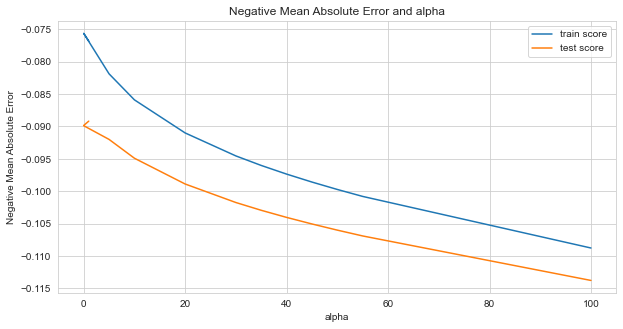

In [136]:
# Plotting mean test and train scoes with alpha 


plt.figure(figsize = (10,5))
plt.plot(ridge_regressor_cv_results['param_alpha'], ridge_regressor_cv_results['mean_train_score'])
plt.plot(ridge_regressor_cv_results['param_alpha'], ridge_regressor_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [137]:
# Building Ridge Regression Model using best alpha 

from sklearn.linear_model import Ridge

best_ridge = Ridge(alpha = 1)
best_ridge.fit(X_train_rfe, y_train)

best_ridge_y_train_pred = best_ridge.predict(X_train_rfe)
best_ridge_y_test_pred = best_ridge.predict(X_test_rfe)

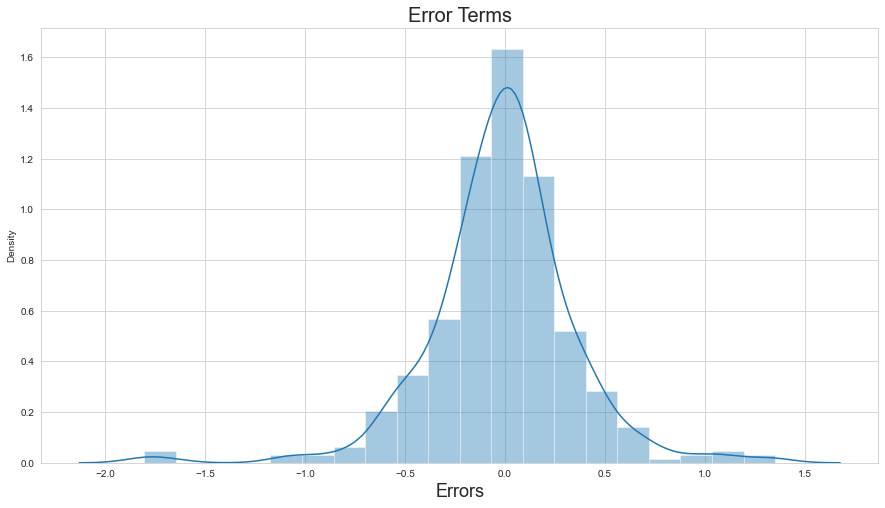

In [138]:
# Plot the histogram of the error terms

plt.figure(figsize=(15,8))
sns.distplot((y_test - best_ridge_y_test_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [139]:
print(best_ridge.coef_)

[ 0.22482907  0.15208644 -0.14035321  0.23526358  0.39690558  0.11947946
 -0.18422958  0.70456926 -0.34396422 -0.43477724 -0.16835304 -0.10710556
 -0.31251518 -0.2407167  -0.50417193 -0.16727755 -0.20928822 -0.18452007
 -0.24257967 -0.39974618 -0.12297689 -0.12359534  0.150294    0.12465912
 -0.27805023 -0.15534016  0.21577625  0.20384941  0.34121401  0.22659851
  0.09789035  0.19476803 -0.2986828   0.08833978  0.13444615  0.17970453
  0.12318665  0.30258164 -0.09980545  0.20913911 -0.39430407 -0.14083837
  0.111777    0.09420667 -0.26768977  0.13097075  0.36396373  0.18346559
  0.16208363 -0.15412959]


In [140]:
best_ridge_param = pd.DataFrame({'Features' : X_train_rfe.columns , 'Coefficients' : best_ridge.coef_})
best_ridge_param.head(5)

,Features,Coefficients
0,OverallQual,0.224829
1,OverallCond,0.152086
2,BsmtUnfSF,-0.140353
3,TotalBsmtSF,0.235264
4,GrLivArea,0.396906


In [141]:
best_ridge_intercept = pd.DataFrame({'Features' : ['Intercept'] , 'Coefficients' : best_ridge.intercept_})
best_ridge_intercept

,Features,Coefficients
0,Intercept,-0.971649


In [142]:
# Top 10 Ridge Predictor Variables

best_ridge_param = pd.concat([best_ridge_param, best_ridge_intercept], axis = 0)
best_ridge_param['Absolute Coefficients'] = np.abs(best_ridge_param['Coefficients'])
best_ridge_param = best_ridge_param.sort_values(by = 'Absolute Coefficients', ascending = False) 
best_ridge_param = best_ridge_param.reset_index(drop = True)
best_ridge_param.head(11)

,Features,Coefficients,Absolute Coefficients
0,Intercept,-0.971649,0.971649
1,MSZoning_Residentail,0.704569,0.704569
2,Neighborhood_MeadowV,-0.504172,0.504172
3,Neighborhood_BrDale,-0.434777,0.434777
4,Neighborhood_OldTown,-0.399746,0.399746
5,GrLivArea,0.396906,0.396906
6,Foundation_Wood,-0.394304,0.394304
7,SaleType_New,0.363964,0.363964
8,Neighborhood_Blueste,-0.343964,0.343964
9,Exterior1st_BrkFace,0.341214,0.341214


In [143]:
# Calculating Metrics of training and test dataset

from sklearn import metrics

print('best_ridge_r2_score_train', round(metrics.r2_score(y_train , best_ridge_y_train_pred), 3))
print('best_ridge_r2_score_test', round(metrics.r2_score(y_test, best_ridge_y_test_pred), 3))
print('best_ridge_MAE_train', round(metrics.mean_absolute_error(y_train , best_ridge_y_train_pred), 3))
print('best_ridge_MAE_test', round(metrics.mean_absolute_error(y_test, best_ridge_y_test_pred), 3))
print('best_ridge_MSE_train', round(metrics.mean_squared_error(y_train , best_ridge_y_train_pred), 3))
print('best_ridge_MSE_test', round(metrics.mean_squared_error(y_test, best_ridge_y_test_pred), 3))
print('best_ridge_RMSE_train', round(np.sqrt(metrics.mean_squared_error(y_train , best_ridge_y_train_pred)),3))
print('best_ridge_RMSE_test', round(np.sqrt(metrics.mean_squared_error(y_test, best_ridge_y_test_pred)),3))

best_ridge_r2_score_train 0.922
best_ridge_r2_score_test 0.881
best_ridge_MAE_train 0.205
best_ridge_MAE_test 0.247
best_ridge_MSE_train 0.078
best_ridge_MSE_test 0.13
best_ridge_RMSE_train 0.279
best_ridge_RMSE_test 0.36


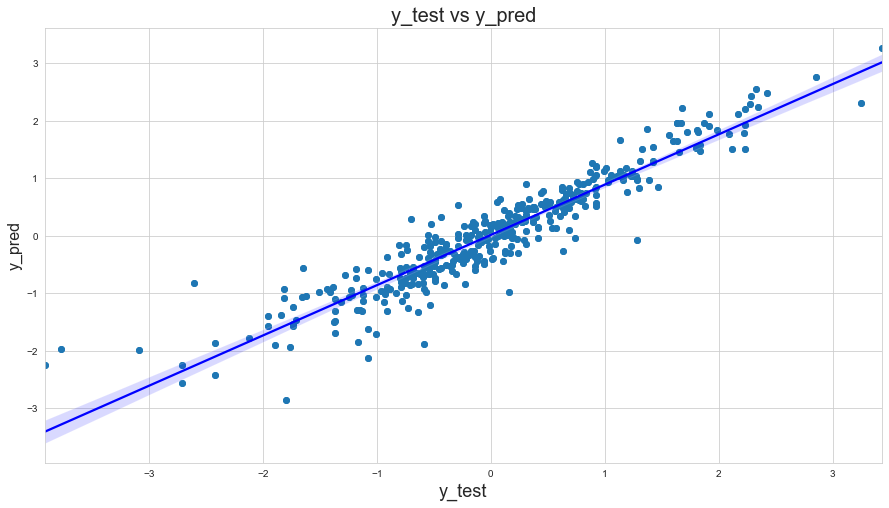

In [144]:
# Plotting y_test and y_pred to understand the spread

plt.figure(figsize=(15,8))
plt.scatter(y_test,best_ridge_y_test_pred)
sns.regplot(x=y_test, y=best_ridge_y_test_pred, line_kws={"color": "blue"})
plt.title('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)                          

plt.show()

### 6b. Lasso Regression

In [145]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters={'alpha':[0.00001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004]}
lasso_regressor = GridSearchCV(estimator = lasso, 
                               param_grid = parameters, 
                               scoring = 'neg_mean_squared_error', 
                               cv = 5,
                              return_train_score = True,
                              verbose = 1)

lasso_regressor.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.004]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [146]:
lasso_regressor_cv_results = pd.DataFrame(lasso_regressor.cv_results_)
lasso_regressor_cv_results = lasso_regressor_cv_results.sort_values(by = 'mean_test_score',ascending = False)
lasso_regressor_cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.006000,0.000633,0.001601,4.898822e-04,0.0001,{'alpha': 0.0001},-0.098115,-0.096496,-0.068944,-0.091617,-0.093797,-0.089794,0.010660,1,-0.073330,-0.074454,-0.081136,-0.075234,-0.074878,-0.075806,0.002741
0,0.011399,0.003200,0.002201,7.488394e-04,1e-05,{'alpha': 1e-05},-0.097743,-0.096695,-0.068082,-0.092837,-0.093833,-0.089838,0.011025,2,-0.073167,-0.074301,-0.080915,-0.075101,-0.074730,-0.075643,0.002715
2,0.004599,0.001356,0.001401,4.895328e-04,0.0002,{'alpha': 0.0002},-0.098808,-0.096571,-0.072235,-0.090493,-0.094076,-0.090437,0.009511,3,-0.073775,-0.074915,-0.081611,-0.075635,-0.075325,-0.076252,0.002753
3,0.004599,0.000800,0.001400,4.894739e-04,0.0003,{'alpha': 0.0003},-0.099089,-0.096429,-0.073402,-0.089614,-0.094346,-0.090576,0.009131,4,-0.074224,-0.075463,-0.081982,-0.076302,-0.075884,-0.076771,0.002697
4,0.004400,0.000800,0.001799,7.475256e-04,0.0004,{'alpha': 0.0004},-0.099416,-0.096071,-0.074876,-0.088948,-0.094637,-0.090790,0.008646,5,-0.074718,-0.076063,-0.082462,-0.076865,-0.076362,-0.077294,0.002680
5,0.003801,0.000748,0.002199,7.487263e-04,0.0005,{'alpha': 0.0005},-0.099946,-0.095826,-0.075836,-0.089107,-0.095009,-0.091145,0.008400,6,-0.075323,-0.076653,-0.082958,-0.077553,-0.076904,-0.077878,0.002642
6,0.004200,0.000748,0.002800,4.001408e-04,0.0006,{'alpha': 0.0006},-0.100353,-0.095751,-0.076710,-0.089858,-0.095556,-0.091646,0.008176,7,-0.075951,-0.077362,-0.083499,-0.078179,-0.077470,-0.078492,0.002605
7,0.004800,0.000399,0.002000,6.641573e-07,0.0007,{'alpha': 0.0007},-0.100119,-0.096015,-0.077627,-0.090664,-0.096143,-0.092114,0.007843,8,-0.076546,-0.078275,-0.084098,-0.078848,-0.078007,-0.079155,0.002586
8,0.004200,0.000749,0.002600,4.896097e-04,0.0008,{'alpha': 0.0008},-0.099922,-0.096391,-0.078477,-0.091392,-0.096819,-0.092600,0.007572,9,-0.077200,-0.079103,-0.084724,-0.079546,-0.078626,-0.079840,0.002566
9,0.003000,0.000632,0.001800,3.998044e-04,0.0009,{'alpha': 0.0009},-0.099764,-0.096844,-0.079348,-0.092056,-0.097575,-0.093118,0.007330,10,-0.077853,-0.079921,-0.085333,-0.080186,-0.079322,-0.080523,0.002537


In [147]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0001}
-0.08979386221484842


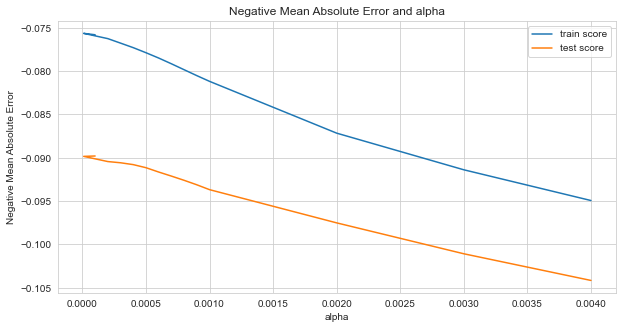

In [148]:
# Plotting mean test and train scoes with alpha 

plt.figure(figsize = (10,5))
plt.plot(lasso_regressor_cv_results['param_alpha'], lasso_regressor_cv_results['mean_train_score'])
plt.plot(lasso_regressor_cv_results['param_alpha'], lasso_regressor_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [149]:
# Building Lasso Regression Model using best alpha

from sklearn.linear_model import Lasso

best_lasso = Lasso(alpha =  0.0001)
best_lasso.fit(X_train_rfe, y_train)

best_lasso_y_train_pred = best_lasso.predict(X_train_rfe)
best_lasso_y_test_pred = best_lasso.predict(X_test_rfe)

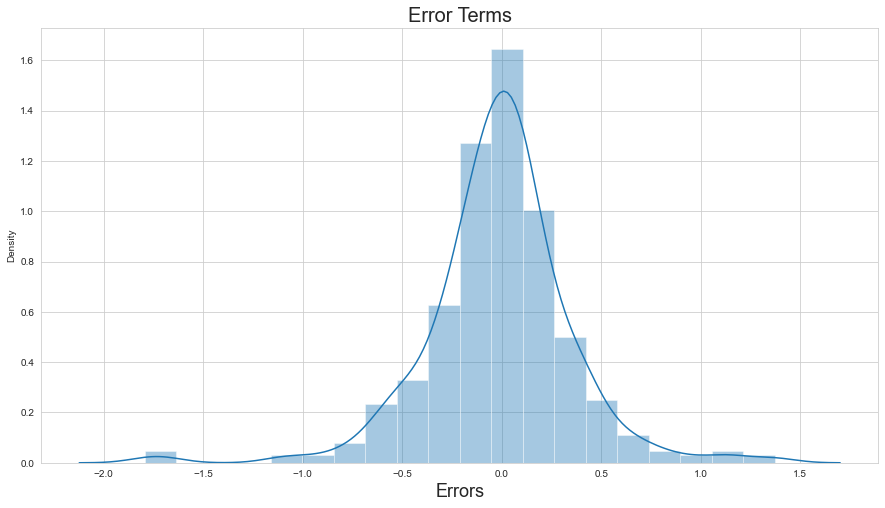

In [150]:
# Plot the histogram of the error terms

plt.figure(figsize=(15,8))
sns.distplot((y_test - best_lasso_y_test_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [151]:
print(best_lasso.coef_)

[ 0.2194373   0.15080304 -0.14135449  0.23375762  0.39679737  0.12068169
 -0.18022046  0.83501113 -0.61026804 -0.49201653 -0.18928215 -0.11581909
 -0.33669929 -0.23846704 -0.59750157 -0.18170835 -0.22845957 -0.21745297
 -0.25990253 -0.42149547 -0.14175176 -0.13426443  0.14741122  0.12609949
 -0.26528005 -0.17564911  0.23055567  0.30496567  0.42776656  0.32332951
  0.1766434   0.27307378 -0.27602653  0.16565909  0.21018645  0.25591007
  0.19945512  0.40883486 -0.12089348  0.26014562 -0.5000221  -0.15631913
  0.11799504  0.11180614 -0.31547377  0.14333641  0.36221536  0.20979565
  0.15915956 -0.1568224 ]


In [152]:
best_lasso_param = pd.DataFrame({'Features' : X_train_rfe.columns , 'Coefficients' : best_lasso.coef_})
best_lasso_param.head(5)

,Features,Coefficients
0,OverallQual,0.219437
1,OverallCond,0.150803
2,BsmtUnfSF,-0.141354
3,TotalBsmtSF,0.233758
4,GrLivArea,0.396797


In [153]:
best_lasso_intercept = pd.DataFrame({'Features' : ['Intercept'] , 'Coefficients' : best_lasso.intercept_})
best_lasso_intercept

,Features,Coefficients
0,Intercept,-1.164809


In [154]:
# Top 10 Lasso Predictor Variables

best_lasso_param = pd.concat([best_lasso_param, best_lasso_intercept], axis = 0)
best_lasso_param['Absolute Coefficients'] = np.abs(best_lasso_param['Coefficients'])
best_lasso_param = best_lasso_param.sort_values(by = 'Absolute Coefficients', ascending = False) 
best_lasso_param = best_lasso_param.reset_index(drop = True)
best_lasso_param.head(11)

,Features,Coefficients,Absolute Coefficients
0,Intercept,-1.164809,1.164809
1,MSZoning_Residentail,0.835011,0.835011
2,Neighborhood_Blueste,-0.610268,0.610268
3,Neighborhood_MeadowV,-0.597502,0.597502
4,Foundation_Wood,-0.500022,0.500022
5,Neighborhood_BrDale,-0.492017,0.492017
6,Exterior1st_BrkFace,0.427767,0.427767
7,Neighborhood_OldTown,-0.421495,0.421495
8,Exterior1st_WdShing,0.408835,0.408835
9,GrLivArea,0.396797,0.396797


In [155]:
# Calculating Metrics of training and test dataset

from sklearn import metrics

print('best_lasso_r2_score_train', round(metrics.r2_score(y_train , best_lasso_y_train_pred), 3))
print('best_lasso_r2_score_test', round(metrics.r2_score(y_test, best_lasso_y_test_pred), 3))
print('best_lasso_MAE_train', round(metrics.mean_absolute_error(y_train , best_lasso_y_train_pred), 3))
print('best_lasso_MAE_test', round(metrics.mean_absolute_error(y_test, best_lasso_y_test_pred), 3))
print('best_lasso_MSE_train', round(metrics.mean_squared_error(y_train , best_lasso_y_train_pred), 3))
print('best_lasso_MSE_test', round(metrics.mean_squared_error(y_test, best_lasso_y_test_pred), 3))
print('best_lasso_RMSE_train', round(np.sqrt(metrics.mean_squared_error(y_train , best_lasso_y_train_pred)),3))
print('best_lasso_RMSE_test', round(np.sqrt(metrics.mean_squared_error(y_test, best_lasso_y_test_pred)),3))

best_lasso_r2_score_train 0.923
best_lasso_r2_score_test 0.878
best_lasso_MAE_train 0.204
best_lasso_MAE_test 0.249
best_lasso_MSE_train 0.077
best_lasso_MSE_test 0.133
best_lasso_RMSE_train 0.277
best_lasso_RMSE_test 0.364


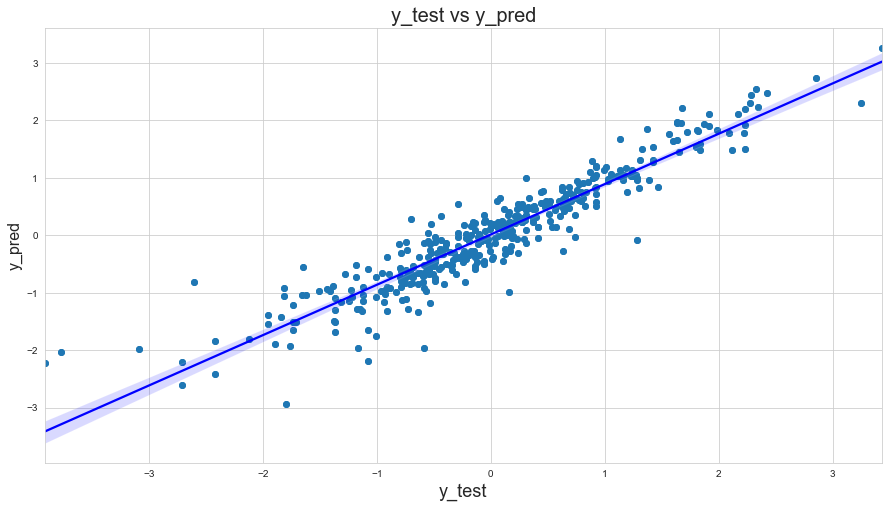

In [156]:
# Plotting y_test and y_pred to understand the spread

plt.figure(figsize=(15,8))
plt.scatter(y_test,best_lasso_y_test_pred)
sns.regplot(x=y_test, y=best_lasso_y_test_pred, line_kws={"color": "blue"})
plt.title('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)                          

plt.show()

#### Q1. Which variabes are significant in predicting the price of a house?

##### Ans a.) Top five features for Ridge Regression (excluding intercept)

In [157]:
best_ridge_param.head(6)

,Features,Coefficients,Absolute Coefficients
0,Intercept,-0.971649,0.971649
1,MSZoning_Residentail,0.704569,0.704569
2,Neighborhood_MeadowV,-0.504172,0.504172
3,Neighborhood_BrDale,-0.434777,0.434777
4,Neighborhood_OldTown,-0.399746,0.399746
5,GrLivArea,0.396906,0.396906


##### Ans b.) Top five features for Lasso Regression (excluding intercept)

In [158]:
best_lasso_param.head(6)

,Features,Coefficients,Absolute Coefficients
0,Intercept,-1.164809,1.164809
1,MSZoning_Residentail,0.835011,0.835011
2,Neighborhood_Blueste,-0.610268,0.610268
3,Neighborhood_MeadowV,-0.597502,0.597502
4,Foundation_Wood,-0.500022,0.500022
5,Neighborhood_BrDale,-0.492017,0.492017


#### Q2. How well those variables describe the price of a house

In [159]:
# Following is the r2_score for train and test set for ridge and lasso respectively:

print('R-squared scores for Ridge Regression using best value of alpha')
print('best_ridge_r2_score_train', round(metrics.r2_score(y_train , best_ridge_y_train_pred), 3))
print('best_ridge_r2_score_test', round(metrics.r2_score(y_test, best_ridge_y_test_pred), 3))
print('\n')
print('R-squared scores for Lasso Regression using best value of alpha')
print('best_lasso_r2_score_train', round(metrics.r2_score(y_train , best_lasso_y_train_pred), 3))
print('best_lasso_r2_score_test', round(metrics.r2_score(y_test, best_lasso_y_test_pred), 3))

R-squared scores for Ridge Regression using best value of alpha
best_ridge_r2_score_train 0.922
best_ridge_r2_score_test 0.881


R-squared scores for Lasso Regression using best value of alpha
best_lasso_r2_score_train 0.923
best_lasso_r2_score_test 0.878


#### Q3. Optimum value of Lambda/Alphas for Ridge and Lasso Regression

## Problem Statement Part II

In [160]:
# Building Ridge Regression Model using double alpha 

from sklearn.linear_model import Ridge

ridge_second = Ridge(alpha = 2)
ridge_second.fit(X_train_rfe, y_train)

ridge_second_y_train_pred = ridge_second.predict(X_train_rfe)
ridge_second_y_test_pred = ridge_second.predict(X_test_rfe)

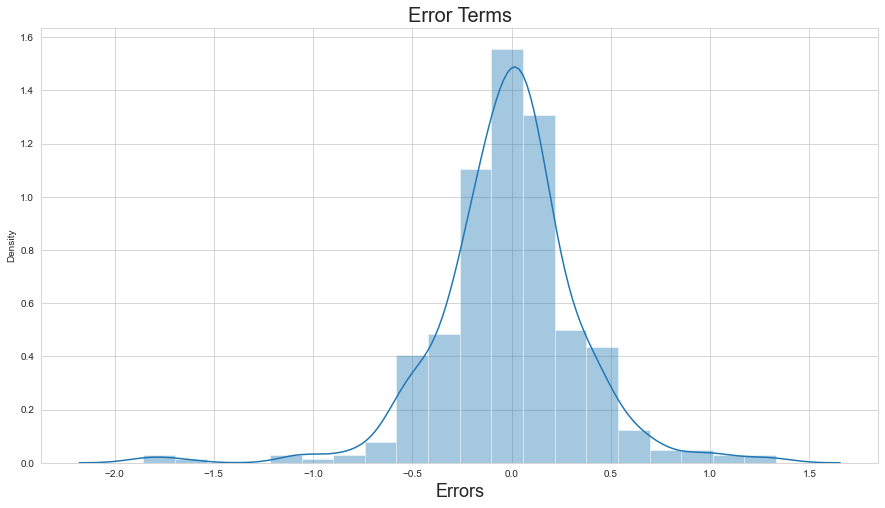

In [161]:
# Plot the histogram of the error terms

plt.figure(figsize=(15,8))
sns.distplot((y_test - ridge_second_y_test_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [162]:
print(ridge_second.coef_)

[ 0.23019364  0.15305308 -0.13917904  0.23622251  0.39723827  0.11830777
 -0.18925698  0.6013934  -0.22381324 -0.38254038 -0.14231208 -0.09664358
 -0.28585897 -0.2291223  -0.42400891 -0.14894017 -0.18712663 -0.14759925
 -0.22207048 -0.37315676 -0.10080323 -0.10977968  0.14831348  0.12408775
 -0.2847076  -0.12785274  0.19188206  0.14039124  0.28305469  0.16086132
  0.04616268  0.14466433 -0.28023417  0.03576066  0.08429632  0.13060658
  0.07349923  0.22754834 -0.07917064  0.16468675 -0.3123468  -0.12063219
  0.07864231  0.06954897 -0.22052701  0.09939894  0.36262003  0.14628554
  0.16297484 -0.14145126]


In [163]:
ridge_second_param = pd.DataFrame({'Features' : X_train_rfe.columns , 'Coefficients' : ridge_second.coef_})
ridge_second_param.head(5)

,Features,Coefficients
0,OverallQual,0.230194
1,OverallCond,0.153053
2,BsmtUnfSF,-0.139179
3,TotalBsmtSF,0.236223
4,GrLivArea,0.397238


In [164]:
ridge_second_intercept = pd.DataFrame({'Features' : ['Intercept'] , 'Coefficients' : ridge_second.intercept_})
ridge_second_intercept

,Features,Coefficients
0,Intercept,-0.833609


In [165]:
ridge_second_param = pd.concat([ridge_second_param, ridge_second_intercept], axis = 0)
ridge_second_param['Absolute Coefficients'] = np.abs(best_ridge_param['Coefficients'])
ridge_second_param = ridge_second_param.sort_values(by = 'Absolute Coefficients', ascending = False) 
ridge_second_param = ridge_second_param.reset_index(drop = True)
ridge_second_param.head(100)

,Features,Coefficients,Absolute Coefficients
0,OverallQual,0.230194,0.971649
1,Intercept,-0.833609,0.971649
2,OverallCond,0.153053,0.704569
3,BsmtUnfSF,-0.139179,0.504172
4,TotalBsmtSF,0.236223,0.434777
5,GrLivArea,0.397238,0.399746
6,GarageCars,0.118308,0.396906
7,YearBuilt_Age,-0.189257,0.394304
8,MSZoning_Residentail,0.601393,0.363964
9,Neighborhood_Blueste,-0.223813,0.343964


In [166]:
# Calculating Metrics of training and test dataset

from sklearn import metrics

print('ridge_second_r2_score_train', round(metrics.r2_score(y_train , ridge_second_y_train_pred), 3))
print('ridge_second_r2_score_test', round(metrics.r2_score(y_test, ridge_second_y_test_pred), 3))
print('ridge_second_MAE_train', round(metrics.mean_absolute_error(y_train , ridge_second_y_train_pred), 3))
print('ridge_second_MAE_test', round(metrics.mean_absolute_error(y_test, ridge_second_y_test_pred), 3))
print('ridge_second_MSE_train', round(metrics.mean_squared_error(y_train , ridge_second_y_train_pred), 3))
print('ridge_second_MSE_test', round(metrics.mean_squared_error(y_test, ridge_second_y_test_pred), 3))
print('ridge_second_RMSE_train', round(np.sqrt(metrics.mean_squared_error(y_train , ridge_second_y_train_pred)),3))
print('ridge_second_RMSE_test', round(np.sqrt(metrics.mean_squared_error(y_test, ridge_second_y_test_pred)),3))

ridge_second_r2_score_train 0.921
ridge_second_r2_score_test 0.883
ridge_second_MAE_train 0.206
ridge_second_MAE_test 0.245
ridge_second_MSE_train 0.079
ridge_second_MSE_test 0.127
ridge_second_RMSE_train 0.281
ridge_second_RMSE_test 0.357


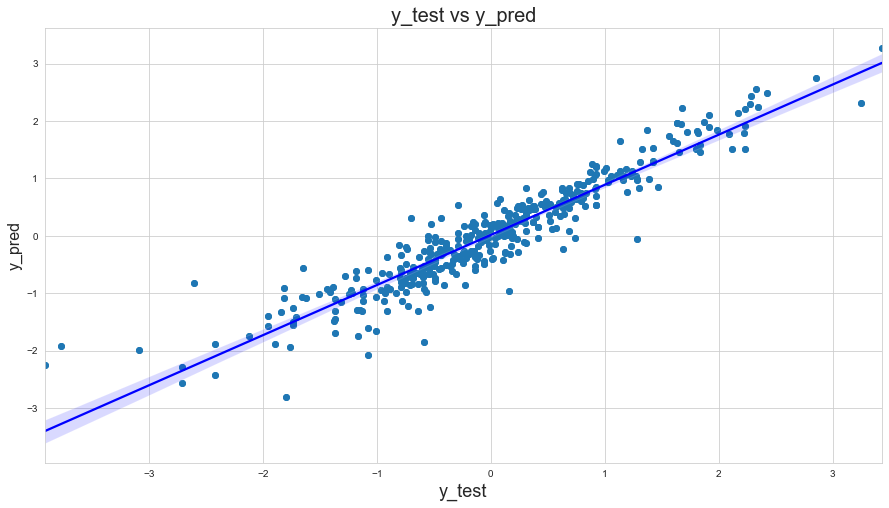

In [167]:
# Plotting y_test and y_pred to understand the spread

plt.figure(figsize=(15,8))
plt.scatter(y_test,ridge_second_y_test_pred)
sns.regplot(x=y_test, y=ridge_second_y_test_pred, line_kws={"color": "blue"})
plt.title('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)                          

plt.show()

In [168]:
# Building Lasso Regression Model using double alpha a

from sklearn.linear_model import Lasso

lasso_second = Lasso(alpha = 0.0001*2)
lasso_second.fit(X_train_rfe, y_train)

lasso_second_y_train_pred = lasso_second.predict(X_train_rfe)
lasso_second_y_test_pred = lasso_second.predict(X_test_rfe)

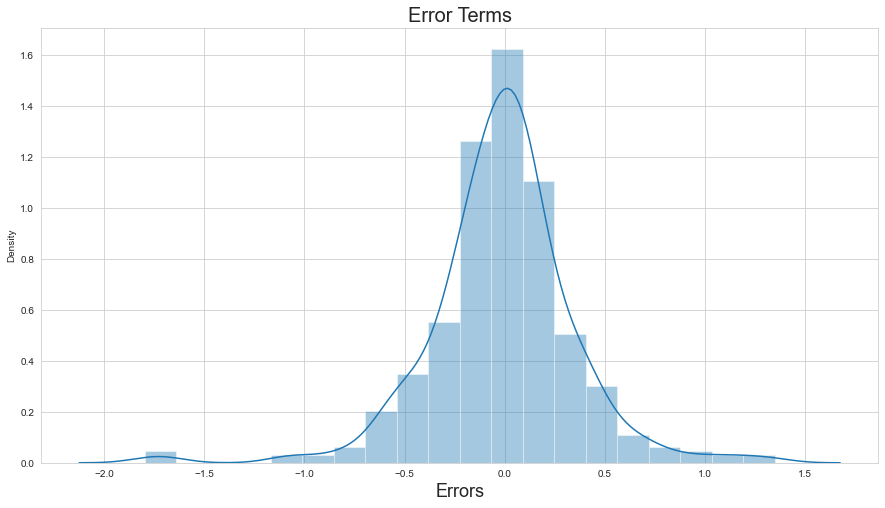

In [169]:
# Plot the histogram of the error terms

plt.figure(figsize=(15,8))
sns.distplot((y_test - lasso_second_y_test_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)             
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [170]:
print(lasso_second.coef_)

[ 0.22252906  0.15121567 -0.14120361  0.23449128  0.39659477  0.12023942
 -0.18210053  0.82125143 -0.50984651 -0.47258182 -0.17905563 -0.109792
 -0.32424586 -0.2325279  -0.5677459  -0.17149382 -0.21930807 -0.19204388
 -0.24930566 -0.41241003 -0.12998291 -0.12600378  0.14427842  0.12488629
 -0.26681953 -0.15287212  0.21638676  0.21906441  0.32546349  0.21427076
  0.07336188  0.17274668 -0.35235296  0.06007395  0.10429259  0.15402723
  0.09752397  0.29041306 -0.10553497  0.22496301 -0.4669296  -0.14154976
  0.02530168  0.09356314 -0.29038174  0.09749215  0.36320453  0.17830064
  0.15985174 -0.14207268]


In [171]:
lasso_second_param = pd.DataFrame({'Features' : X_train_rfe.columns , 'Coefficients' : lasso_second.coef_})
lasso_second_param.head(5)

,Features,Coefficients
0,OverallQual,0.222529
1,OverallCond,0.151216
2,BsmtUnfSF,-0.141204
3,TotalBsmtSF,0.234491
4,GrLivArea,0.396595


In [172]:
lasso_second_intercept = pd.DataFrame({'Features' : ['Intercept'] , 'Coefficients' : lasso_second.intercept_})
lasso_second_intercept

,Features,Coefficients
0,Intercept,-1.055809


In [173]:
lasso_second_param = pd.concat([lasso_second_param, lasso_second_intercept], axis = 0)
lasso_second_param['Absolute Coefficients'] = np.abs(lasso_second_param['Coefficients'])
lasso_second_param = lasso_second_param.sort_values(by = 'Absolute Coefficients', ascending = False) 
lasso_second_param = lasso_second_param.reset_index(drop = True)
lasso_second_param.head()

,Features,Coefficients,Absolute Coefficients
0,Intercept,-1.055809,1.055809
1,MSZoning_Residentail,0.821251,0.821251
2,Neighborhood_MeadowV,-0.567746,0.567746
3,Neighborhood_Blueste,-0.509847,0.509847
4,Neighborhood_BrDale,-0.472582,0.472582


In [174]:
# Calculating Metrics of training and test dataset

from sklearn import metrics

print('lasso_second_r2_score_train', round(metrics.r2_score(y_train , lasso_second_y_train_pred), 3))
print('lasso_second_r2_score_test', round(metrics.r2_score(y_test, lasso_second_y_test_pred), 3))
print('lasso_second_MAE_train', round(metrics.mean_absolute_error(y_train , lasso_second_y_train_pred), 3))
print('lasso_second_MAE_test', round(metrics.mean_absolute_error(y_test, lasso_second_y_test_pred), 3))
print('lasso_second_MSE_train', round(metrics.mean_squared_error(y_train , lasso_second_y_train_pred), 3))
print('lasso_second_MSE_test', round(metrics.mean_squared_error(y_test, lasso_second_y_test_pred), 3))
print('lasso_second_RMSE_train', round(np.sqrt(metrics.mean_squared_error(y_train , lasso_second_y_train_pred)),3))
print('lasso_second_RMSE_test', round(np.sqrt(metrics.mean_squared_error(y_test, lasso_second_y_test_pred)),3))

lasso_second_r2_score_train 0.923
lasso_second_r2_score_test 0.88
lasso_second_MAE_train 0.205
lasso_second_MAE_test 0.248
lasso_second_MSE_train 0.077
lasso_second_MSE_test 0.13
lasso_second_RMSE_train 0.278
lasso_second_RMSE_test 0.361


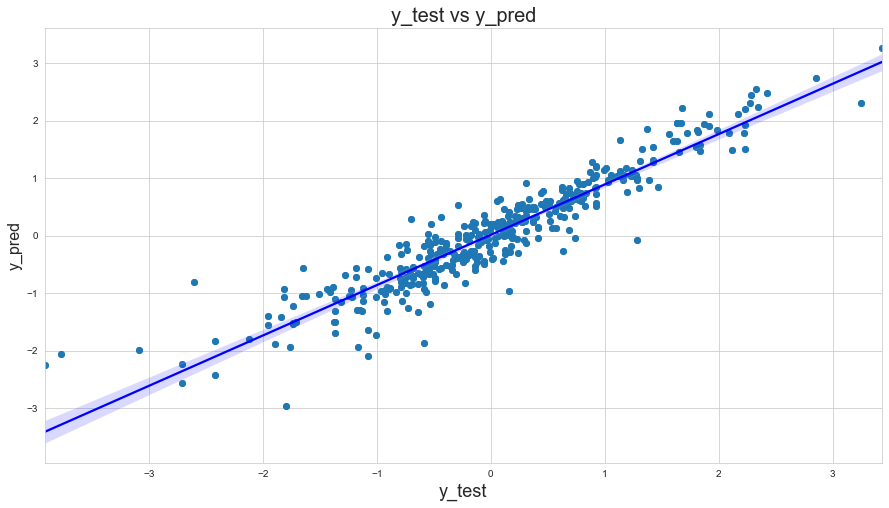

In [175]:
# Plotting y_test and y_pred to understand the spread

plt.figure(figsize=(15,8))
plt.scatter(y_test,lasso_second_y_test_pred)
sns.regplot(x=y_test, y=lasso_second_y_test_pred, line_kws={"color": "blue"})
plt.title('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)                          

plt.show()

#### Q4. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [176]:
# Following is the r2_scores for train and test set for ridge and lasso respectively:

print('R-squared scores for Ridge Regression using Best value of alpha')
print('best_ridge_r2_score_train', round(metrics.r2_score(y_train , best_ridge_y_train_pred), 5))
print('best_ridge_r2_score_test', round(metrics.r2_score(y_test, best_ridge_y_test_pred), 5))
print('\n')
print('R-squared scores for Ridge Regression using Double value of alpha')
print('ridge_second_r2_score_train', round(metrics.r2_score(y_train , ridge_second_y_train_pred), 5))
print('ridge_second_r2_score_test', round(metrics.r2_score(y_test, ridge_second_y_test_pred), 5))
print('\n')
print('R-squared scores for Lasso Regression using Best value of alpha')
print('best_lasso_r2_score_train', round(metrics.r2_score(y_train , best_lasso_y_train_pred), 5))
print('best_lasso_r2_score_test', round(metrics.r2_score(y_test, best_lasso_y_test_pred), 5))
print('\n')
print('R-squared scores for Lasso Regression using Double value of alpha')
print('lasso_second_r2_score_train', round(metrics.r2_score(y_train , lasso_second_y_train_pred), 5))
print('lasso_second_r2_score_test', round(metrics.r2_score(y_test, lasso_second_y_test_pred), 5))

R-squared scores for Ridge Regression using Best value of alpha
best_ridge_r2_score_train 0.92229
best_ridge_r2_score_test 0.88059


R-squared scores for Ridge Regression using Double value of alpha
ridge_second_r2_score_train 0.92111
ridge_second_r2_score_test 0.88261


R-squared scores for Lasso Regression using Best value of alpha
best_lasso_r2_score_train 0.92305
best_lasso_r2_score_test 0.87777


R-squared scores for Lasso Regression using Double value of alpha
lasso_second_r2_score_train 0.92256
lasso_second_r2_score_test 0.87998


#### Q5. What will be the most important predictor variables after the change is implemented?

##### Ans a.) Top five features for Ridge Regression (excluding intercept)

In [177]:
ridge_second_param.head(6)

,Features,Coefficients,Absolute Coefficients
0,OverallQual,0.230194,0.971649
1,Intercept,-0.833609,0.971649
2,OverallCond,0.153053,0.704569
3,BsmtUnfSF,-0.139179,0.504172
4,TotalBsmtSF,0.236223,0.434777
5,GrLivArea,0.397238,0.399746


##### Ans b.) Top five features for Lasso Regression (excluding intercept)

In [178]:
lasso_second_param.head(6)

,Features,Coefficients,Absolute Coefficients
0,Intercept,-1.055809,1.055809
1,MSZoning_Residentail,0.821251,0.821251
2,Neighborhood_MeadowV,-0.567746,0.567746
3,Neighborhood_Blueste,-0.509847,0.509847
4,Neighborhood_BrDale,-0.472582,0.472582
5,Foundation_Wood,-0.466930,0.466930


## Problem Statement Part III

In [179]:
best_lasso_param.head(6)

,Features,Coefficients,Absolute Coefficients
0,Intercept,-1.164809,1.164809
1,MSZoning_Residentail,0.835011,0.835011
2,Neighborhood_Blueste,-0.610268,0.610268
3,Neighborhood_MeadowV,-0.597502,0.597502
4,Foundation_Wood,-0.500022,0.500022
5,Neighborhood_BrDale,-0.492017,0.492017


In [180]:
# Let's drop the top5 features from the train and test datasets and rebuild the lasso model

lasso_train_new = X_train_rfe
lasso_test_new = X_test_rfe

In [181]:
lasso_train_new = lasso_train_new.drop(['MSZoning_Residentail', 'Neighborhood_Blueste', 'Neighborhood_MeadowV', 'Foundation_Wood', 'Neighborhood_BrDale'], axis = 1)
lasso_test_new = lasso_test_new.drop(['MSZoning_Residentail', 'Neighborhood_Blueste', 'Neighborhood_MeadowV', 'Foundation_Wood', 'Neighborhood_BrDale'], axis = 1)

In [182]:
lasso_train_new.shape, lasso_test_new.shape 

((940, 45), (403, 45))

In [183]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_new = Lasso()
parameters={'alpha':[0.00001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004]}
lasso_new_regressor = GridSearchCV(estimator = lasso, 
                               param_grid = parameters, 
                               scoring = 'neg_mean_squared_error', 
                               cv = 5,
                              return_train_score = True,
                              verbose = 1)

lasso_new_regressor.fit(lasso_train_new,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.004]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [184]:
lasso_new_regressor_cv_results = pd.DataFrame(lasso_new_regressor.cv_results_)
lasso_new_regressor_cv_results = lasso_new_regressor_cv_results.sort_values(by = 'mean_test_score',ascending = False)
lasso_new_regressor_cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011200,0.002713,0.002600,4.899988e-04,1e-05,{'alpha': 1e-05},-0.098729,-0.097865,-0.082731,-0.099760,-0.106993,-0.097216,0.007932,1,-0.083418,-0.084124,-0.088106,-0.084189,-0.081694,-0.084306,0.002102
1,0.009797,0.001599,0.003201,3.999483e-04,0.0001,{'alpha': 0.0001},-0.098623,-0.097151,-0.084899,-0.098460,-0.106983,-0.097223,0.007080,2,-0.083557,-0.084256,-0.088274,-0.084300,-0.081828,-0.084443,0.002114
4,0.003800,0.001166,0.002201,4.014262e-04,0.0004,{'alpha': 0.0004},-0.098966,-0.096161,-0.088200,-0.095528,-0.107500,-0.097271,0.006230,3,-0.084875,-0.085845,-0.089040,-0.085716,-0.083237,-0.085743,0.001893
2,0.008399,0.000800,0.003001,4.523674e-07,0.0002,{'alpha': 0.0002},-0.098811,-0.096612,-0.086595,-0.097217,-0.107234,-0.097294,0.006573,4,-0.083972,-0.084652,-0.088511,-0.084633,-0.082232,-0.084800,0.002054
3,0.005998,0.001413,0.002400,7.996691e-04,0.0003,{'alpha': 0.0003},-0.098811,-0.096334,-0.087833,-0.096184,-0.107540,-0.097340,0.006308,5,-0.084390,-0.085306,-0.088800,-0.085186,-0.082876,-0.085312,0.001947
5,0.003600,0.000800,0.002200,4.003048e-04,0.0005,{'alpha': 0.0005},-0.099051,-0.095952,-0.088523,-0.095799,-0.107674,-0.097400,0.006193,6,-0.085271,-0.086318,-0.089314,-0.086053,-0.083615,-0.086114,0.001857
6,0.004200,0.000749,0.002200,4.003057e-04,0.0006,{'alpha': 0.0006},-0.099099,-0.095966,-0.089250,-0.096112,-0.107877,-0.097661,0.006041,7,-0.085695,-0.086806,-0.089654,-0.086409,-0.084015,-0.086516,0.001837
7,0.002800,0.000980,0.002201,4.003764e-04,0.0007,{'alpha': 0.0007},-0.099055,-0.096071,-0.089568,-0.096496,-0.108068,-0.097852,0.005991,8,-0.086134,-0.087260,-0.089990,-0.086767,-0.084429,-0.086916,0.001810
8,0.003800,0.000748,0.001600,4.900188e-04,0.0008,{'alpha': 0.0008},-0.099024,-0.096205,-0.089644,-0.096939,-0.108245,-0.098012,0.006003,9,-0.086536,-0.087720,-0.090262,-0.087295,-0.084827,-0.087328,0.001769
9,0.003200,0.000748,0.001800,7.485960e-04,0.0009,{'alpha': 0.0009},-0.099016,-0.096379,-0.089674,-0.097375,-0.108401,-0.098169,0.006024,10,-0.086941,-0.088241,-0.090519,-0.087737,-0.085192,-0.087726,0.001738


In [185]:
print(lasso_new_regressor.best_params_)
print(lasso_new_regressor.best_score_)

{'alpha': 1e-05}
-0.09721569678930266


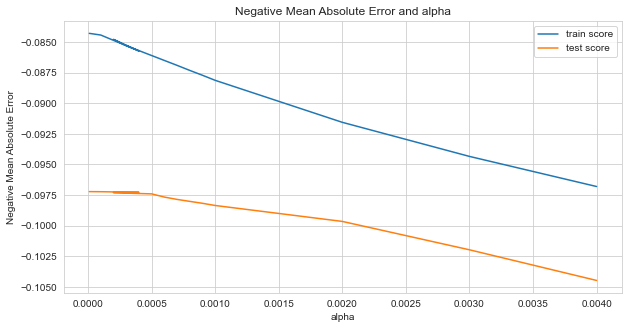

In [186]:
# Plotting mean test and train scoes with alpha 

plt.figure(figsize = (10,5))
plt.plot(lasso_new_regressor_cv_results['param_alpha'], lasso_new_regressor_cv_results['mean_train_score'])
plt.plot(lasso_new_regressor_cv_results['param_alpha'], lasso_new_regressor_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [187]:
# Building Lasso Regression Model using best alpha

from sklearn.linear_model import Lasso

best_lasso_new = Lasso(alpha = 1e-05)
best_lasso_new.fit(lasso_train_new, y_train)

best_lasso_new_y_train_pred = best_lasso_new.predict(lasso_train_new)
best_lasso_new_y_test_pred = best_lasso_new.predict(lasso_test_new)

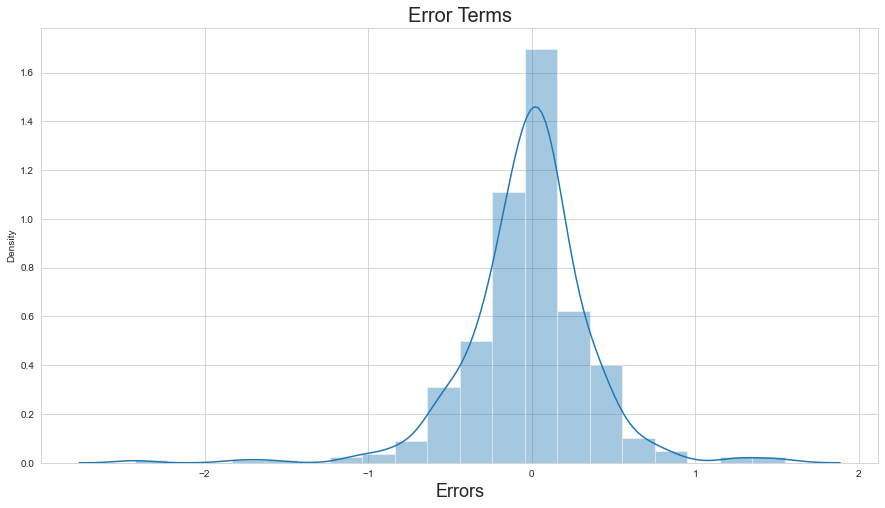

In [188]:
# Plot the histogram of the error terms

plt.figure(figsize=(15,8))
sns.distplot((y_test - best_lasso_new_y_test_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [189]:
print(best_lasso_new.coef_)

[ 0.23673453  0.15630601 -0.13760381  0.24163544  0.40044461  0.11732209
 -0.18821471 -0.13650438 -0.09508292 -0.27573438 -0.34013283 -0.14530741
 -0.1798279  -0.1188167  -0.22541404 -0.37414023 -0.0816499  -0.10505883
  0.17898118  0.11771888 -0.44164343 -0.17024186  0.26964242  0.39919903
  0.55492587  0.33580114  0.27910533  0.3942218  -0.16017142  0.29580777
  0.35862714  0.38304386  0.33179131  0.51928988 -0.08088385  0.18473123
 -0.12485018  0.19369924  0.01351667 -0.31519835  0.27179644  0.3939738
  0.28069164  0.18618021 -0.23223832]


In [190]:
best_lasso_new_param = pd.DataFrame({'Features' : lasso_train_new.columns , 'Coefficients' : best_lasso_new.coef_})
best_lasso_new_param.head(5)

,Features,Coefficients
0,OverallQual,0.236735
1,OverallCond,0.156306
2,BsmtUnfSF,-0.137604
3,TotalBsmtSF,0.241635
4,GrLivArea,0.400445


In [191]:
best_lasso_new_intercept = pd.DataFrame({'Features' : ['Intercept'] , 'Coefficients' : best_lasso_new.intercept_})
best_lasso_new_intercept

,Features,Coefficients
0,Intercept,-0.503421


In [192]:
best_lasso_new_param = pd.concat([best_lasso_new_param, best_lasso_new_intercept], axis = 0)
best_lasso_new_param['Absolute Coefficients'] = np.abs(best_lasso_new_param['Coefficients'])
best_lasso_new_param = best_lasso_new_param.sort_values(by = 'Absolute Coefficients', ascending = False) 
best_lasso_new_param = best_lasso_new_param.reset_index(drop = True)
best_lasso_new_param.head(100)

,Features,Coefficients,Absolute Coefficients
0,Exterior1st_BrkFace,0.554926,0.554926
1,Exterior1st_WdShing,0.519290,0.519290
2,Intercept,-0.503421,0.503421
3,BldgType_Twnhs,-0.441643,0.441643
4,GrLivArea,0.400445,0.400445
5,RoofStyle_Shed,0.399199,0.399199
6,Exterior1st_MetalSd,0.394222,0.394222
7,SaleType_New,0.393974,0.393974
8,Exterior1st_VinylSd,0.383044,0.383044
9,Neighborhood_OldTown,-0.374140,0.374140


In [193]:
# Calculating Metrics of training and test dataset

from sklearn import metrics

print('best_lasso_new_r2_score_train', round(metrics.r2_score(y_train , best_lasso_new_y_train_pred), 3))
print('best_lasso_new_r2_score_test', round(metrics.r2_score(y_test, best_lasso_new_y_test_pred), 3))
print('best_lasso_new_MAE_train', round(metrics.mean_absolute_error(y_train , best_lasso_new_y_train_pred), 3))
print('best_lasso_new_MAE_test', round(metrics.mean_absolute_error(y_test, best_lasso_new_y_test_pred), 3))
print('best_lasso_new_MSE_train', round(metrics.mean_squared_error(y_train , best_lasso_new_y_train_pred), 3))
print('best_lasso_new_MSE_test', round(metrics.mean_squared_error(y_test, best_lasso_new_y_test_pred), 3))
print('best_lasso_new_RMSE_train', round(np.sqrt(metrics.mean_squared_error(y_train , best_lasso_new_y_train_pred)),3))
print('best_lasso_new_RMSE_test', round(np.sqrt(metrics.mean_squared_error(y_test, best_lasso_new_y_test_pred)),3))

best_lasso_new_r2_score_train 0.915
best_lasso_new_r2_score_test 0.871
best_lasso_new_MAE_train 0.215
best_lasso_new_MAE_test 0.252
best_lasso_new_MSE_train 0.085
best_lasso_new_MSE_test 0.14
best_lasso_new_RMSE_train 0.292
best_lasso_new_RMSE_test 0.375


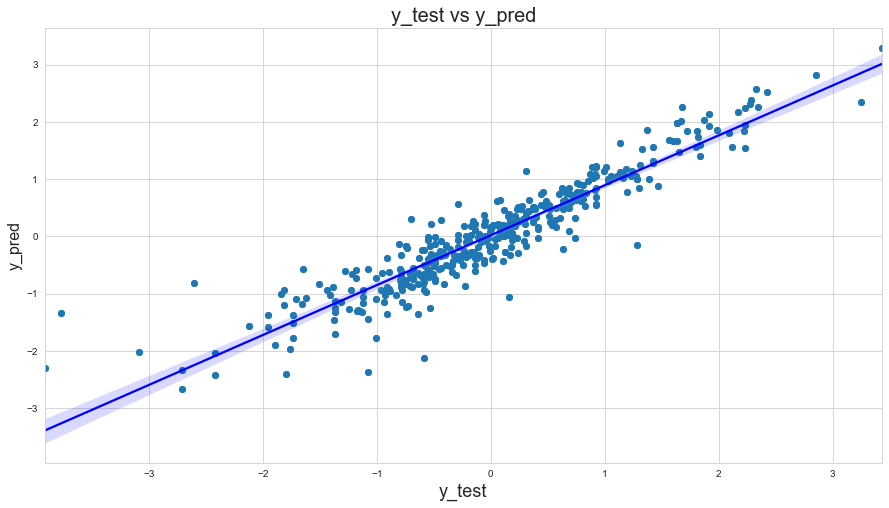

In [194]:
# Plotting y_test and y_pred to understand the spread

plt.figure(figsize=(15,8))
plt.scatter(y_test,best_lasso_new_y_test_pred)
sns.regplot(x=y_test, y=best_lasso_new_y_test_pred, line_kws={"color": "blue"})
plt.title('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)                          

plt.show()

#### Q6. Which are the five most important predictor variables now?

In [195]:
# Top 5 most important predictor variables (excluding intercept)

best_lasso_new_param.head(6)

,Features,Coefficients,Absolute Coefficients
0,Exterior1st_BrkFace,0.554926,0.554926
1,Exterior1st_WdShing,0.519290,0.519290
2,Intercept,-0.503421,0.503421
3,BldgType_Twnhs,-0.441643,0.441643
4,GrLivArea,0.400445,0.400445
5,RoofStyle_Shed,0.399199,0.399199
